In [ ]:
%pip install wandb weave catboost jedi -qU

  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 19.9/19.9 MB 96.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 677.1/677.1 kB 43.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 45.5/45.5 kB 3.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 99.2/99.2 MB 8.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 78.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 81.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.6/42.6 kB 3.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 203.4/203.4 kB 17.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.6/5.6 MB 106.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.2/1.2 MB 62.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 89.9/89.9 kB 8.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 83.6/83.6 kB 6.9 MB/s eta 0:00:00


## 1- Load the dataset from my google drive

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import wandb

wandb.login()

/usr/local/lib/python3.12/dist-packages/notebook/notebookapp.py:191: SyntaxWarning: invalid escape sequence '\/'
  | |_| | '_ \/ _` / _` |  _/ -_)


<IPython.core.display.Javascript object>

wandb: Logging into wandb.ai. (Learn how to deploy a W&B server locally: https://wandb.me/wandb-server)
wandb: You can find your API key in your browser here: https://wandb.ai/authorize
wandb: Paste an API key from your profile and hit enter:

 ··········


wandb: WARNING If you're specifying your api key in code, ensure this code is not shared publicly.
wandb: WARNING Consider setting the WANDB_API_KEY environment variable, or running `wandb login` from the command line.
wandb: No netrc file found, creating one.
wandb: Appending key for api.wandb.ai to your netrc file: /root/.netrc
wandb: Currently logged in as: adham_ayman to https://api.wandb.ai. Use `wandb login --relogin` to force relogin


True

In [2]:
DATA_DIR = "/content/drive/MyDrive/Colab Notebooks/AI/Machine Learning/Pima Indians Diabetes/diabetes.csv"

In [3]:
data = pd.read_csv(DATA_DIR)

In [4]:
data.shape

(768, 9)

In [5]:
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


## 2- Exploratory Data Analysis (EDA)

In [6]:
print(f"Number of  null values:\n{data.isna().sum()}")

Number of  null values:
Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64


In [7]:
print(f"Number of  dublicated values: {data.duplicated().sum()}")

Number of  dublicated values: 0


In [8]:
data.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


<Axes: xlabel='Outcome', ylabel='count'>

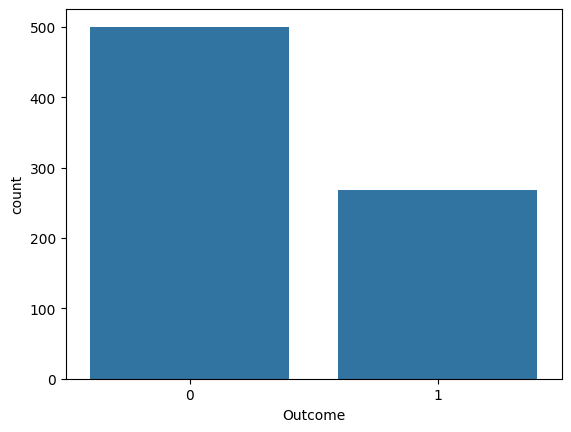

In [9]:
sns.countplot(data=data, x="Outcome")

In [10]:
data["Outcome"].value_counts() / len(data) *100

,count
Outcome,
0,65.104167
1,34.895833




> TODO: imbalanced dataset



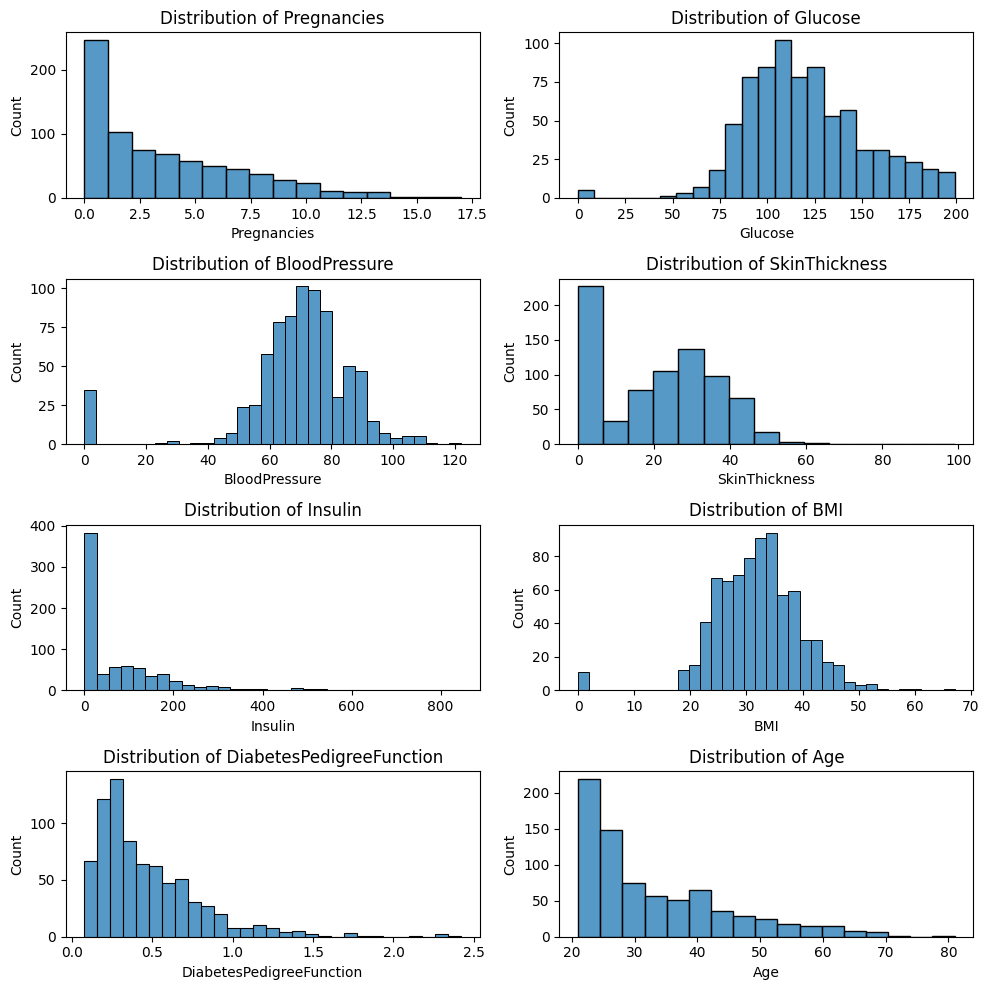

In [11]:
_, axes = plt.subplots(nrows=4, ncols=2, figsize=(10, 10))
axes = axes.flatten()

for i, col in enumerate(data.columns):
    if col != "Outcome":
        sns.histplot(data=data, x=col, ax=axes[i])
        axes[i].set_title(f'Distribution of {col}')

plt.tight_layout()
plt.show()

### 2.1- Body Mass Index (BMI)

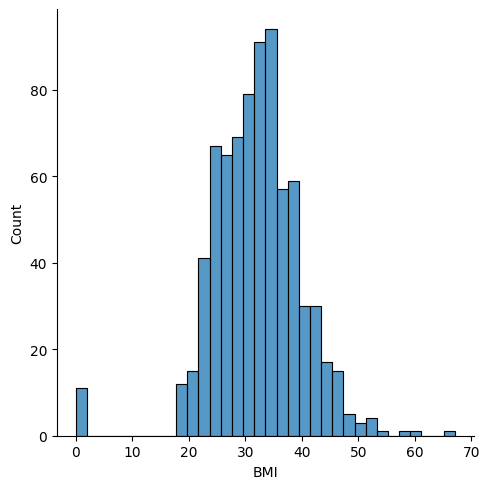

In [12]:
sns.displot(data=data, x="BMI")

In [13]:
data["BMI"].sort_values().head(5)

,BMI
49,0.0
60,0.0
706,0.0
81,0.0
684,0.0


In [14]:
(data["BMI"] <=0 ).sum()

np.int64(11)

> I noticed I will repeat the same code for every column, so I wrote a simple reusable function to automate the process.

In [15]:
def invalid_data_count(data, col, sympl=0,ignore=None ):
  if ignore is None:
    ignore = []
  if col in ignore:
    return
  invalid_data_count = (data[col] == sympl ).sum()
  if invalid_data_count > 0:
    sns.displot(data=data, x=col)
    plt.show()
    print()
    print(f"Invalid data in {col} ==> {invalid_data_count} with ~{round(invalid_data_count / len(data)*100,3) }% from totle value\n")


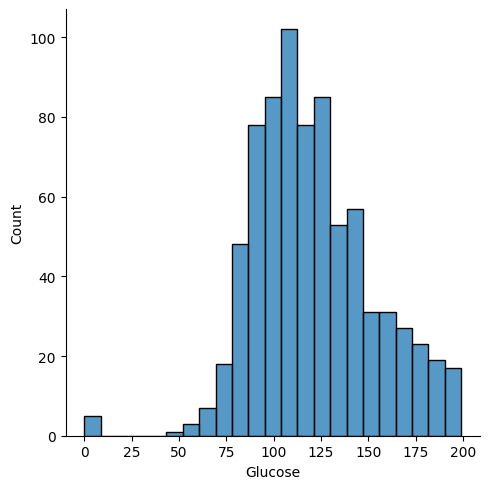


Invalid data in Glucose ==> 5 with ~0.651% from totle value



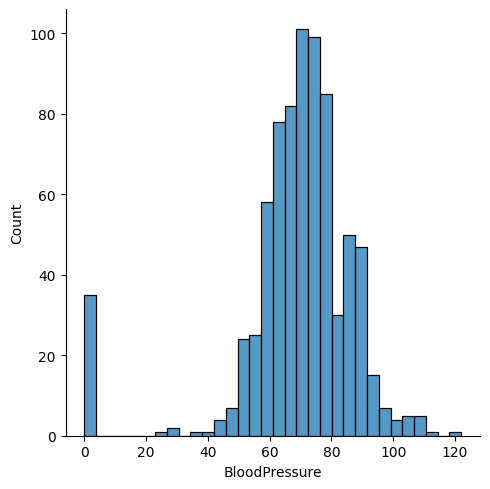


Invalid data in BloodPressure ==> 35 with ~4.557% from totle value



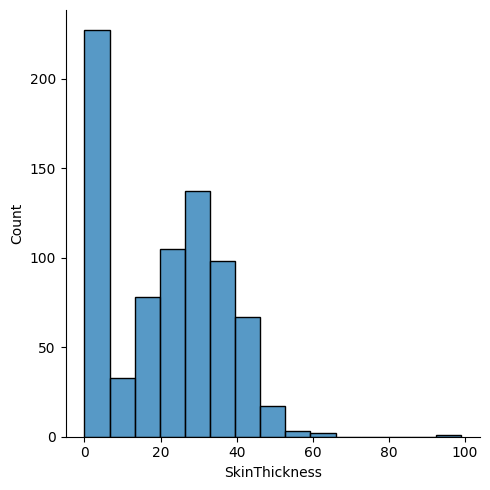


Invalid data in SkinThickness ==> 227 with ~29.557% from totle value



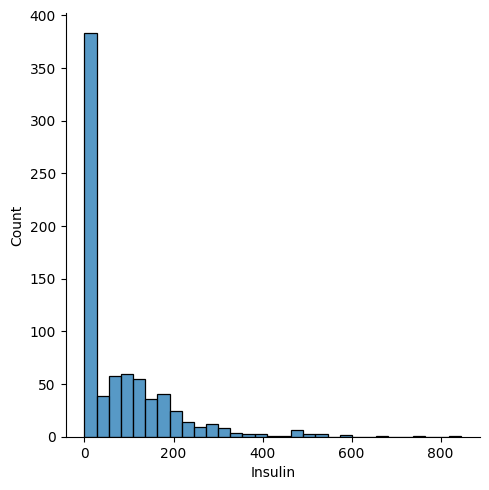


Invalid data in Insulin ==> 374 with ~48.698% from totle value



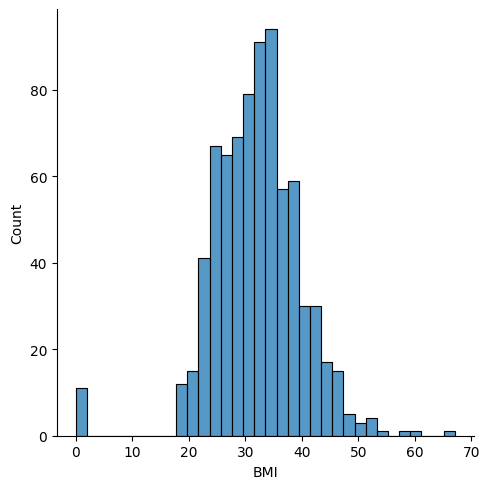


Invalid data in BMI ==> 11 with ~1.432% from totle value



In [16]:
for col in data.columns:
  invalid_data_count(data, col, 0,["Pregnancies","Outcome"])

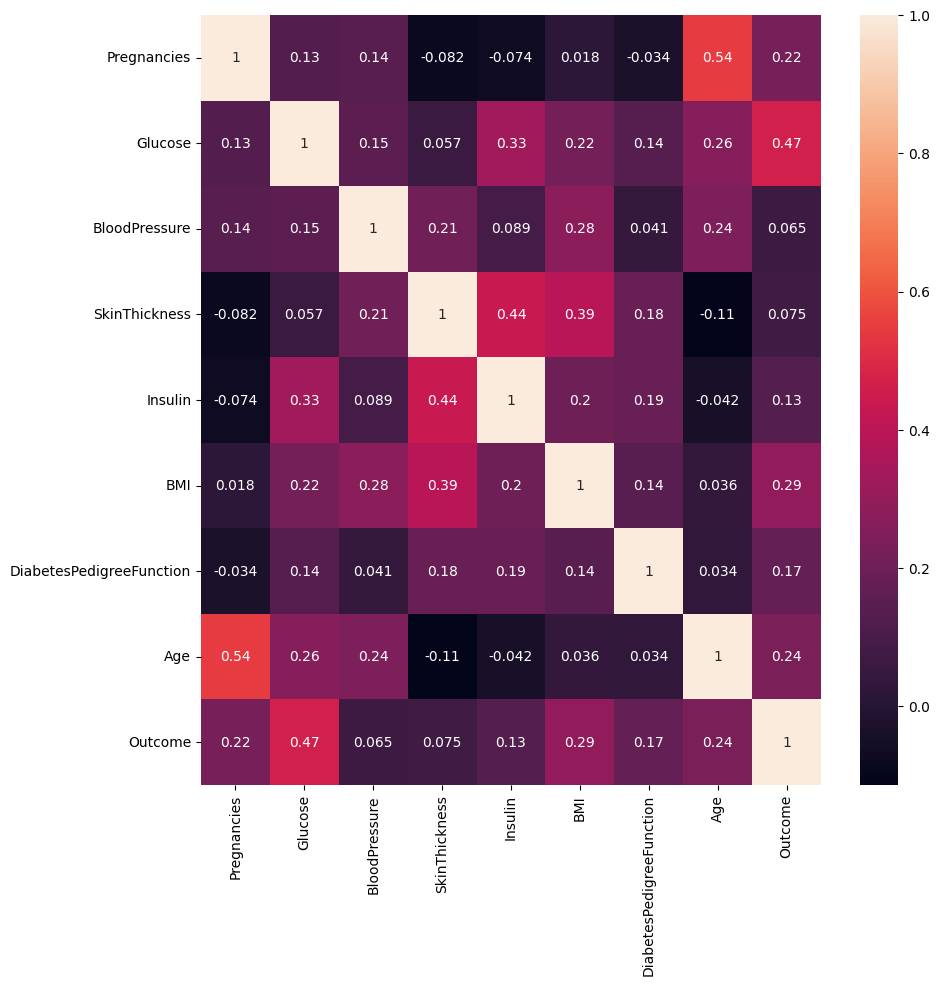

In [17]:
plt.figure(figsize=(10,10))
sns.heatmap(data.corr(), annot=True, )
plt.show()

#### 📝 TODOs for Data Preprocessing (Pima Diabetes)

- [ ] Handle invalid values in (Glucose, BloodPressure, SkinThickness, BMI, Insulin)
  - [ ] Impute missing values (Median) ➡ SkinThickness, BMI, Insulin
  - [ ] Impute missing values (mean) ➡ Glucose, BloodPressure,
- [ ] Check for imbalanced dataset ➡ apply SMOTE/undersampling/oversampling


## 3- Preprocessing & Pipeline

In [18]:
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint,loguniform ,uniform

In [19]:
scaling_feture = [col for col in data.columns if col != "Outcome"]
scaling_feture

['Pregnancies',
 'Glucose',
 'BloodPressure',
 'SkinThickness',
 'Insulin',
 'BMI',
 'DiabetesPedigreeFunction',
 'Age']

In [20]:
median_fearue = ["SkinThickness", "BMI", "Insulin"]
mean_fearue = ["Glucose", "BloodPressure"]

In [21]:
preprocessing_with_scaling = ColumnTransformer(transformers=[
    ("median", SimpleImputer(missing_values=0, strategy="median"), median_fearue),
    ("mean", SimpleImputer(missing_values=0, strategy="mean"), mean_fearue),
    ("scaler", StandardScaler(), scaling_feture)
])

preprocessing = ColumnTransformer(transformers=[
    ("median", SimpleImputer(missing_values=0, strategy="median"), median_fearue),
    ("mean", SimpleImputer(missing_values=0, strategy="mean"), mean_fearue),
])

In [22]:
from sklearn.model_selection import train_test_split
X = data.drop("Outcome", axis=1)
y = data["Outcome"]
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.3, random_state=21)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=21)

> **Note:**
This function evaluates a binary classification model — printing metrics, confusion matrix, and ROC curve — while logging results and visualizations to **Weights & Biases (W&B)**. It can also save the best model locally for later use.


In [23]:
import joblib
import os
import numpy as np
from sklearn.metrics import (
    classification_report, confusion_matrix, ConfusionMatrixDisplay,
    accuracy_score, roc_auc_score, average_precision_score,
    roc_curve, matthews_corrcoef
)
from sklearn.pipeline import Pipeline
from sklearn.model_selection import RandomizedSearchCV

def evaluate_binary_classification(
    model,
    X,
    y,
    model_name=None,
    sampling_method="original", #original, class_weight, SMOTE ect..
    data_split="test",  # 'train', 'val', 'test'
    project_name="pima_indians_diabetes_experiments",
    save_model=False,
    save_dir="models",
    save_plots=True, # Add a parameter to control plot saving
    plot_dir="plots", # Add a parameter for the plot directory
):
    """
    Evaluate a binary classification model, log to W&B,
    print results locally, and optionally save the best model and plots.
    """

    # Initialize wandb run
    wandb.init(
        project=project_name,
        group=f"{data_split}",
        name=f"{model_name or type(model).__name__}_{sampling_method}_{data_split}"
    )

    # Handle RandomizedSearchCV
    if isinstance(model, RandomizedSearchCV):
        best_params = model.best_params_
        print("=== Best Parameters ===\n")
        print(best_params, "\n")
        wandb.config.update(best_params)
        model = model.best_estimator_ # Use the best estimator for evaluation
    else:
        best_params = {} # Or log model parameters differently if needed

    # Predictions
    y_true = y
    y_pred = model.predict(X)
    y_proba = model.predict_proba(X)[:, 1]

    # Metrics
    acc = accuracy_score(y_true, y_pred)
    roc_auc = roc_auc_score(y_true, y_proba)
    pr_auc = average_precision_score(y_true, y_proba)
    mcc = matthews_corrcoef(y_true, y_pred)
    report = classification_report(y_true, y_pred, target_names=["Non-diabetic", "Diabetic"], output_dict=True)

    # ===== Local printout =====
    print(f"\nResults ({data_split.upper()} set):")
    print("=== Classification Report ===")
    print(classification_report(y_true, y_pred, target_names=["Non-diabetic", "Diabetic"]))

    print("=== Extra Metrics ===")
    print(f"Accuracy: {acc*100:.4f}%")
    print(f"ROC-AUC: {roc_auc:.4f}")
    print(f"PR-AUC (Average Precision): {pr_auc:.4f}")
    print(f"MCC: {mcc:.4f}")

    # ===== Confusion Matrix =====
    cm = confusion_matrix(y_true, y_pred)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm)
    disp.plot(cmap="Blues")
    plt.title(f"Confusion Matrix ({data_split.upper()} set)")
    if save_plots: # Save plot if enabled
        os.makedirs(plot_dir, exist_ok=True)
        plot_path = os.path.join(plot_dir, f"confusion_matrix_{model_name or 'model'}_{sampling_method}_{data_split}.png")
        plt.savefig(plot_path)
        print(f"Confusion matrix plot saved to: {plot_path}")
        wandb.log({"confusion_matrix_plot": wandb.Image(plot_path)}) # Log plot as artifact
    plt.show()

    # ===== ROC Curve =====
    fpr, tpr, _ = roc_curve(y_true, y_proba)
    plt.plot(fpr, tpr, label=f"ROC-AUC = {roc_auc:.4f}")
    plt.plot([0, 1], [0, 1], linestyle="--", color="gray")
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate (Recall)")
    plt.title(f"ROC Curve ({data_split.upper()} set)")
    plt.legend()
    if save_plots: # Save plot if enabled
        os.makedirs(plot_dir, exist_ok=True)
        plot_path = os.path.join(plot_dir, f"roc_curve_{model_name or 'model'}_{sampling_method}_{data_split}.png")
        plt.savefig(plot_path)
        print(f"ROC curve plot saved to: {plot_path}")
        wandb.log({"roc_curve_plot": wandb.Image(plot_path)}) # Log plot as artifact
    plt.show()


    # ===== Log to wandb =====
    wandb.log({
        "dataset_split": data_split,
        "accuracy": acc,
        "roc_auc": roc_auc,
        "pr_auc": pr_auc,
        "mcc": mcc,
        "precision_non_diabetic": report["Non-diabetic"]["precision"],
        "recall_non_diabetic": report["Non-diabetic"]["recall"],
        "precision_diabetic": report["Diabetic"]["precision"],
        "recall_diabetic": report["Diabetic"]["recall"],
        "confusion_matrix": wandb.plot.confusion_matrix(
            probs=None,
            y_true=y_true.to_numpy(), # Convert to numpy array
            preds=y_pred,
            class_names=["Non-diabetic", "Diabetic"]
        ),
        "roc_curve": wandb.plot.roc_curve(
            y_true.to_numpy(), # Convert to numpy array
            np.column_stack([1 - y_proba, y_proba]),
            labels=["Non-diabetic", "Diabetic"]
        ),
    })

    # ===== Optional model saving =====
    if save_model:
        os.makedirs(save_dir, exist_ok=True)
        model_path = os.path.join(save_dir, f"{model_name or 'model'}_{sampling_method}.pkl")
        joblib.dump(model, model_path)
        print(f"\nModel saved to: {model_path}")
        # Log the model as an artifact in W&B
        wandb.save(model_path)

    wandb.finish()

    # Return results as dictionary
    return {
        "best_params": best_params,
        "accuracy": acc,
        "roc_auc": roc_auc,
        "pr_auc": pr_auc,
        "mcc": mcc,
        "report": report,
        "confusion_matrix": cm
    }

## 4- Model

#### Decision Tree Classifier (dt)

=== Best Parameters ===

{'dt__criterion': 'log_loss', 'dt__max_depth': 5, 'dt__min_samples_split': 2} 


Results (TRAIN set):
=== Classification Report ===
              precision    recall  f1-score   support

Non-diabetic       0.95      0.65      0.77       356
    Diabetic       0.58      0.94      0.71       181

    accuracy                           0.75       537
   macro avg       0.77      0.79      0.74       537
weighted avg       0.83      0.75      0.75       537

=== Extra Metrics ===
Accuracy: 74.6741%
ROC-AUC: 0.8979
PR-AUC (Average Precision): 0.7918
MCC: 0.5587
Confusion matrix plot saved to: plots/confusion_matrix_decision_tree_dt_class_weight_train.png


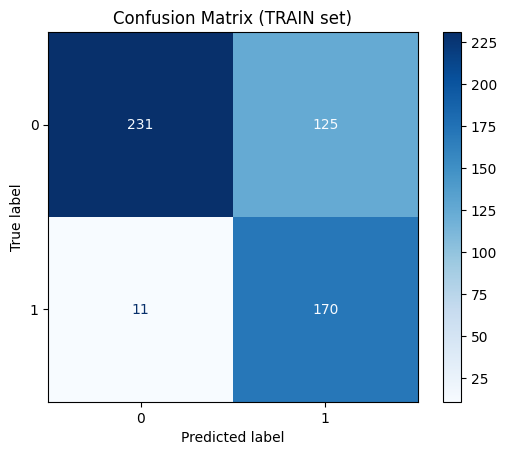

ROC curve plot saved to: plots/roc_curve_decision_tree_dt_class_weight_train.png


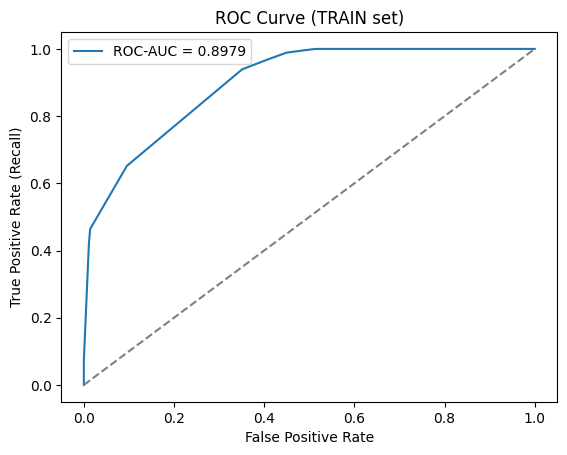

accuracy,▁
mcc,▁
pr_auc,▁
precision_diabetic,▁
precision_non_diabetic,▁
recall_diabetic,▁
recall_non_diabetic,▁
roc_auc,▁
accuracy,0.74674
dataset_split,train
mcc,0.55873


=== Best Parameters ===

{'dt__criterion': 'log_loss', 'dt__max_depth': 5, 'dt__min_samples_split': 2} 


Results (VAL set):
=== Classification Report ===
              precision    recall  f1-score   support

Non-diabetic       0.72      0.60      0.66        68
    Diabetic       0.53      0.66      0.59        47

    accuracy                           0.63       115
   macro avg       0.63      0.63      0.62       115
weighted avg       0.64      0.63      0.63       115

=== Extra Metrics ===
Accuracy: 62.6087%
ROC-AUC: 0.6973
PR-AUC (Average Precision): 0.5545
MCC: 0.2581
Confusion matrix plot saved to: plots/confusion_matrix_decision_tree_dt_class_weight_val.png


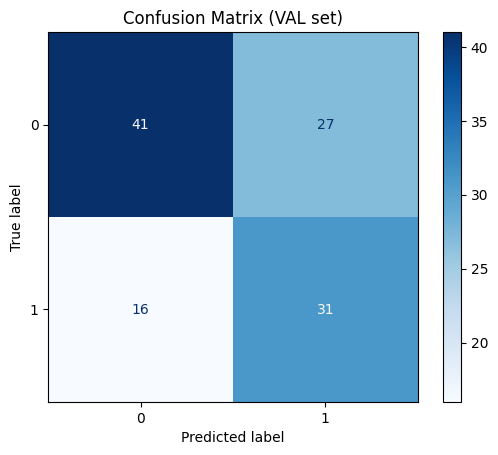

ROC curve plot saved to: plots/roc_curve_decision_tree_dt_class_weight_val.png


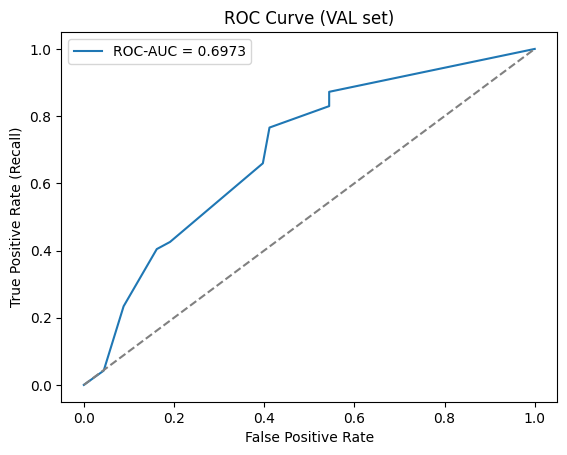

accuracy,▁
mcc,▁
pr_auc,▁
precision_diabetic,▁
precision_non_diabetic,▁
recall_diabetic,▁
recall_non_diabetic,▁
roc_auc,▁
accuracy,0.62609
dataset_split,val
mcc,0.25811


{'best_params': {'dt__criterion': 'log_loss',
  'dt__max_depth': 5,
  'dt__min_samples_split': 2},
 'accuracy': 0.6260869565217392,
 'roc_auc': np.float64(0.6972778473091363),
 'pr_auc': np.float64(0.5544731158284574),
 'mcc': np.float64(0.2581113788709638),
 'report': {'Non-diabetic': {'precision': 0.7192982456140351,
   'recall': 0.6029411764705882,
   'f1-score': 0.656,
   'support': 68.0},
  'Diabetic': {'precision': 0.5344827586206896,
   'recall': 0.6595744680851063,
   'f1-score': 0.5904761904761905,
   'support': 47.0},
  'accuracy': 0.6260869565217392,
  'macro avg': {'precision': 0.6268905021173623,
   'recall': 0.6312578222778473,
   'f1-score': 0.6232380952380953,
   'support': 115.0},
  'weighted avg': {'precision': 0.6437649596254504,
   'recall': 0.6260869565217392,
   'f1-score': 0.6292207039337474,
   'support': 115.0}},
 'confusion_matrix': array([[41, 27],
        [16, 31]])}

In [ ]:
from sklearn.tree import DecisionTreeClassifier
dt_params = {
    "dt__max_depth": randint(2, 20),
    "dt__min_samples_split": randint(2, 10),
    "dt__criterion": ["gini", "entropy", "log_loss"]
}
dt_pipeline = Pipeline(steps=[
    ("preprocessing", preprocessing),
    ("dt", DecisionTreeClassifier(class_weight="balanced"))
])
dt_model = RandomizedSearchCV(estimator=dt_pipeline, param_distributions=dt_params, cv=5,random_state=21, n_iter=40)
dt_model.fit(X_train, y_train)

evaluate_binary_classification(
  model= dt_model,
  X=X_train,
  y= y_train,
  data_split="train",
  sampling_method="class_weight",
  model_name="decision_tree_dt",

  )
evaluate_binary_classification(
  model= dt_model,
  X=X_val,
  y=y_val,
  data_split="val",
  sampling_method="class_weight",
  model_name="decision_tree_dt",
)


### KNeighbors Classifier (knn)

=== Best Parameters ===

{'knn__n_neighbors': 13, 'knn__p': 1, 'knn__weights': 'uniform'} 


Results (TRAIN set):
=== Classification Report ===
              precision    recall  f1-score   support

Non-diabetic       0.82      0.88      0.85       356
    Diabetic       0.73      0.63      0.68       181

    accuracy                           0.80       537
   macro avg       0.78      0.76      0.76       537
weighted avg       0.79      0.80      0.79       537

=== Extra Metrics ===
Accuracy: 79.7020%
ROC-AUC: 0.8539
PR-AUC (Average Precision): 0.7534
MCC: 0.5330
Confusion matrix plot saved to: plots/confusion_matrix_kneighbors_knn_class_weight_train.png


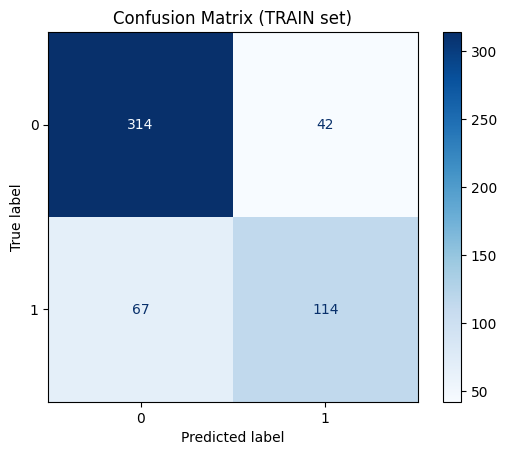

ROC curve plot saved to: plots/roc_curve_kneighbors_knn_class_weight_train.png


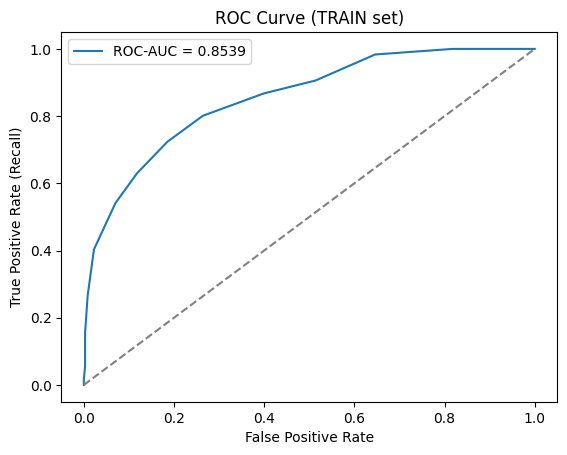

accuracy,▁
mcc,▁
pr_auc,▁
precision_diabetic,▁
precision_non_diabetic,▁
recall_diabetic,▁
recall_non_diabetic,▁
roc_auc,▁
accuracy,0.79702
dataset_split,train
mcc,0.53295


=== Best Parameters ===

{'knn__n_neighbors': 13, 'knn__p': 1, 'knn__weights': 'uniform'} 


Results (VAL set):
=== Classification Report ===
              precision    recall  f1-score   support

Non-diabetic       0.67      0.91      0.78        68
    Diabetic       0.74      0.36      0.49        47

    accuracy                           0.69       115
   macro avg       0.71      0.64      0.63       115
weighted avg       0.70      0.69      0.66       115

=== Extra Metrics ===
Accuracy: 68.6957%
ROC-AUC: 0.7311
PR-AUC (Average Precision): 0.6037
MCC: 0.3361
Confusion matrix plot saved to: plots/confusion_matrix_kneighbors_knn_class_weight_val.png


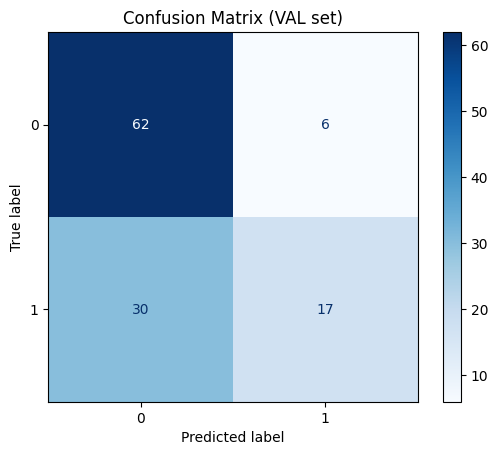

ROC curve plot saved to: plots/roc_curve_kneighbors_knn_class_weight_val.png


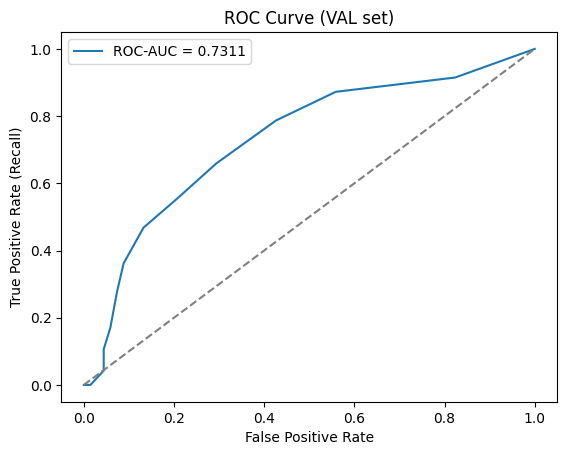

accuracy,▁
mcc,▁
pr_auc,▁
precision_diabetic,▁
precision_non_diabetic,▁
recall_diabetic,▁
recall_non_diabetic,▁
roc_auc,▁
accuracy,0.68696
dataset_split,val
mcc,0.33609


{'best_params': {'knn__n_neighbors': 13,
  'knn__p': 1,
  'knn__weights': 'uniform'},
 'accuracy': 0.6869565217391305,
 'roc_auc': np.float64(0.7310700876095118),
 'pr_auc': np.float64(0.6036870391786753),
 'mcc': np.float64(0.3360858403966819),
 'report': {'Non-diabetic': {'precision': 0.6739130434782609,
   'recall': 0.9117647058823529,
   'f1-score': 0.775,
   'support': 68.0},
  'Diabetic': {'precision': 0.7391304347826086,
   'recall': 0.3617021276595745,
   'f1-score': 0.4857142857142857,
   'support': 47.0},
  'accuracy': 0.6869565217391305,
  'macro avg': {'precision': 0.7065217391304348,
   'recall': 0.6367334167709637,
   'f1-score': 0.6303571428571428,
   'support': 115.0},
  'weighted avg': {'precision': 0.7005671077504726,
   'recall': 0.6869565217391305,
   'f1-score': 0.6567701863354038,
   'support': 115.0}},
 'confusion_matrix': array([[62,  6],
        [30, 17]])}

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

knn_params = {
    "knn__n_neighbors": randint(3, 15),
    "knn__weights": ["uniform", "distance"],
    "knn__p": [1, 2]
}

knn_pipeline = Pipeline(steps=[
    ("preprocessing", preprocessing),
    ("knn", KNeighborsClassifier(weights="distance"))
])

knn_model = RandomizedSearchCV(estimator= knn_pipeline, param_distributions=knn_params, cv=5, n_jobs=-1,random_state=21,n_iter=40)
knn_model.fit(X_train, y_train)


evaluate_binary_classification(
  model= knn_model,
  X=X_train,
  y= y_train,
  data_split="train",
  model_name="kneighbors_knn",
  sampling_method="class_weight",

  )
evaluate_binary_classification(
  model= knn_model,
  X=X_val,
  y=y_val,
  data_split="val",
  model_name="kneighbors_knn",
  sampling_method="class_weight",

)

### Random Forest Classifier (rf)

=== Best Parameters ===

{'rf__bootstrap': True, 'rf__max_depth': 15, 'rf__min_samples_split': 7, 'rf__n_estimators': 222} 


Results (TRAIN set):
=== Classification Report ===
              precision    recall  f1-score   support

Non-diabetic       0.97      0.97      0.97       356
    Diabetic       0.94      0.94      0.94       181

    accuracy                           0.96       537
   macro avg       0.96      0.96      0.96       537
weighted avg       0.96      0.96      0.96       537

=== Extra Metrics ===
Accuracy: 96.0894%
ROC-AUC: 0.9937
PR-AUC (Average Precision): 0.9873
MCC: 0.9126
Confusion matrix plot saved to: plots/confusion_matrix_random_forest_rf_class_weight_train.png


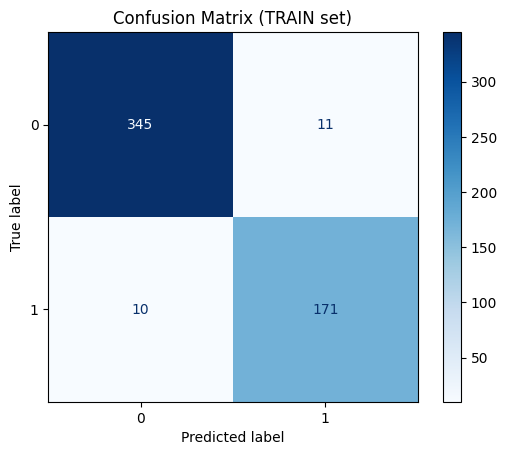

ROC curve plot saved to: plots/roc_curve_random_forest_rf_class_weight_train.png


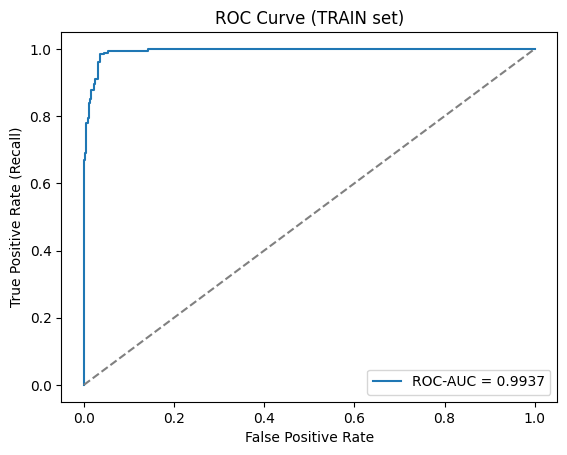

accuracy,▁
mcc,▁
pr_auc,▁
precision_diabetic,▁
precision_non_diabetic,▁
recall_diabetic,▁
recall_non_diabetic,▁
roc_auc,▁
accuracy,0.96089
dataset_split,train
mcc,0.91262


=== Best Parameters ===

{'rf__bootstrap': True, 'rf__max_depth': 15, 'rf__min_samples_split': 7, 'rf__n_estimators': 222} 


Results (VAL set):
=== Classification Report ===
              precision    recall  f1-score   support

Non-diabetic       0.69      0.87      0.77        68
    Diabetic       0.69      0.43      0.53        47

    accuracy                           0.69       115
   macro avg       0.69      0.65      0.65       115
weighted avg       0.69      0.69      0.67       115

=== Extra Metrics ===
Accuracy: 68.6957%
ROC-AUC: 0.7397
PR-AUC (Average Precision): 0.6265
MCC: 0.3319
Confusion matrix plot saved to: plots/confusion_matrix_random_forest_rf_class_weight_val.png


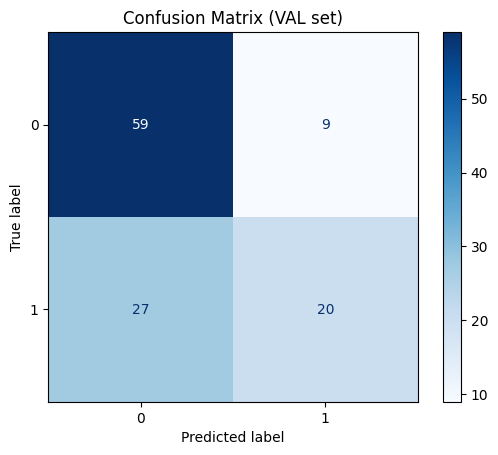

ROC curve plot saved to: plots/roc_curve_random_forest_rf_class_weight_val.png


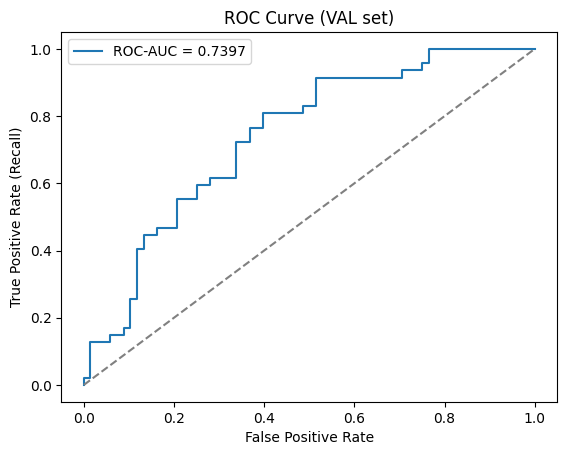

accuracy,▁
mcc,▁
pr_auc,▁
precision_diabetic,▁
precision_non_diabetic,▁
recall_diabetic,▁
recall_non_diabetic,▁
roc_auc,▁
accuracy,0.68696
dataset_split,val
mcc,0.33189


{'best_params': {'rf__bootstrap': True,
  'rf__max_depth': 15,
  'rf__min_samples_split': 7,
  'rf__n_estimators': 222},
 'accuracy': 0.6869565217391305,
 'roc_auc': np.float64(0.7396745932415519),
 'pr_auc': np.float64(0.6264999556834138),
 'mcc': np.float64(0.331885272573444),
 'report': {'Non-diabetic': {'precision': 0.686046511627907,
   'recall': 0.8676470588235294,
   'f1-score': 0.7662337662337663,
   'support': 68.0},
  'Diabetic': {'precision': 0.6896551724137931,
   'recall': 0.425531914893617,
   'f1-score': 0.5263157894736842,
   'support': 47.0},
  'accuracy': 0.6869565217391305,
  'macro avg': {'precision': 0.68785084202085,
   'recall': 0.6465894868585732,
   'f1-score': 0.6462747778537252,
   'support': 115.0},
  'weighted avg': {'precision': 0.6875213556012691,
   'recall': 0.6869565217391305,
   'f1-score': 0.6681803322535589,
   'support': 115.0}},
 'confusion_matrix': array([[59,  9],
        [27, 20]])}

In [ ]:
from sklearn.ensemble import RandomForestClassifier
rf_params = {
    "rf__n_estimators": randint(100, 300),
    "rf__max_depth": randint(3, 20),
    "rf__min_samples_split": randint(2, 10),
    "rf__bootstrap": [True, False]
}

rf_pipeline = Pipeline(steps=[
    ("preprocessing", preprocessing),
    ("rf", RandomForestClassifier(class_weight="balanced"))
])
rf_model = RandomizedSearchCV(estimator= rf_pipeline, param_distributions=rf_params, cv=5, n_jobs=-1,random_state=21,n_iter=20)
rf_model.fit(X_train, y_train)

evaluate_binary_classification(
  model= rf_model,
  X=X_train,
  y= y_train,
  data_split="train",
  model_name="random_forest_rf",
  sampling_method="class_weight",

  )
evaluate_binary_classification(
  model= rf_model,
  X=X_val,
  y=y_val,
  data_split="val",
  model_name="random_forest_rf",
  sampling_method="class_weight",
)

### LogisticRegression (log_reg)

=== Best Parameters ===

{'lr__C': np.float64(3.173566896140885), 'lr__fit_intercept': False, 'lr__penalty': 'l1', 'lr__tol': np.float64(0.008684044839930884)} 


Results (TRAIN set):
=== Classification Report ===
              precision    recall  f1-score   support

Non-diabetic       0.86      0.78      0.82       356
    Diabetic       0.64      0.76      0.69       181

    accuracy                           0.77       537
   macro avg       0.75      0.77      0.76       537
weighted avg       0.79      0.77      0.78       537

=== Extra Metrics ===
Accuracy: 77.2812%
ROC-AUC: 0.8565
PR-AUC (Average Precision): 0.7488
MCC: 0.5189
Confusion matrix plot saved to: plots/confusion_matrix_log_reg_class_weight_train.png


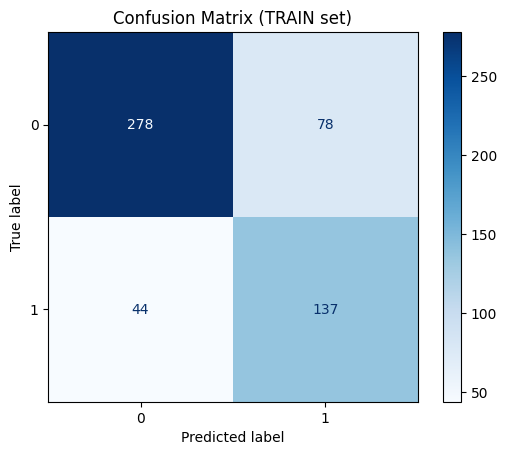

ROC curve plot saved to: plots/roc_curve_log_reg_class_weight_train.png


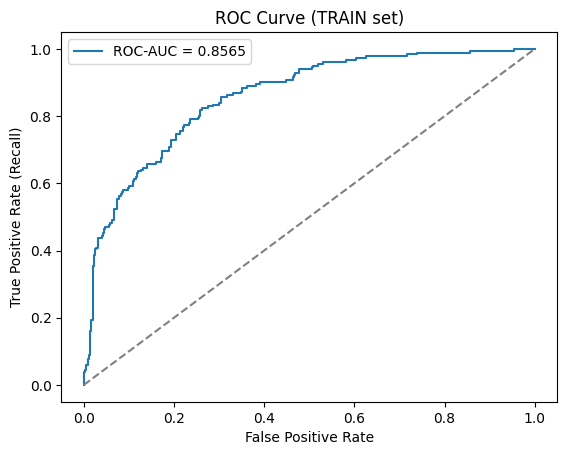

accuracy,▁
mcc,▁
pr_auc,▁
precision_diabetic,▁
precision_non_diabetic,▁
recall_diabetic,▁
recall_non_diabetic,▁
roc_auc,▁
accuracy,0.77281
dataset_split,train
mcc,0.51885


=== Best Parameters ===

{'lr__C': np.float64(3.173566896140885), 'lr__fit_intercept': False, 'lr__penalty': 'l1', 'lr__tol': np.float64(0.008684044839930884)} 


Results (VAL set):
=== Classification Report ===
              precision    recall  f1-score   support

Non-diabetic       0.74      0.78      0.76        68
    Diabetic       0.65      0.60      0.62        47

    accuracy                           0.70       115
   macro avg       0.69      0.69      0.69       115
weighted avg       0.70      0.70      0.70       115

=== Extra Metrics ===
Accuracy: 70.4348%
ROC-AUC: 0.7525
PR-AUC (Average Precision): 0.6820
MCC: 0.3812
Confusion matrix plot saved to: plots/confusion_matrix_log_reg_class_weight_val.png


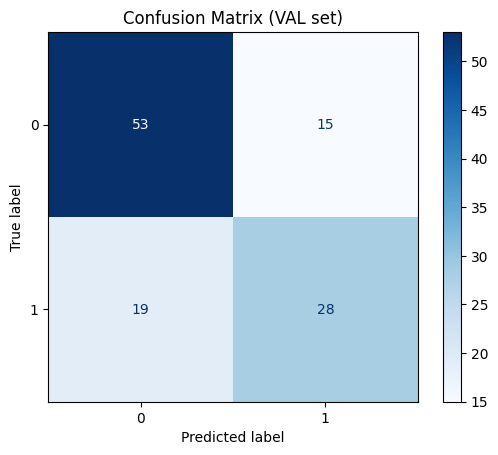

ROC curve plot saved to: plots/roc_curve_log_reg_class_weight_val.png


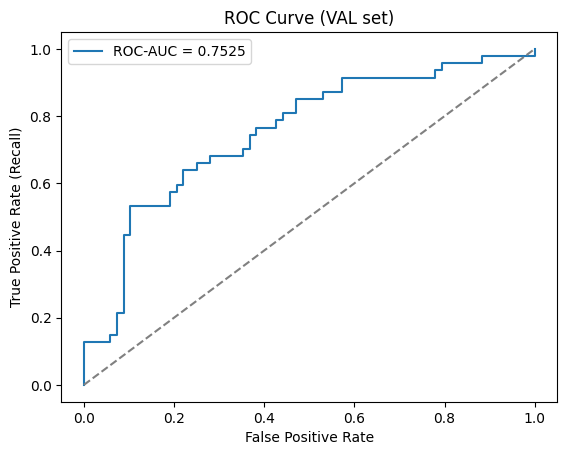

accuracy,▁
mcc,▁
pr_auc,▁
precision_diabetic,▁
precision_non_diabetic,▁
recall_diabetic,▁
recall_non_diabetic,▁
roc_auc,▁
accuracy,0.70435
dataset_split,val
mcc,0.38117


{'best_params': {'lr__C': np.float64(3.173566896140885),
  'lr__fit_intercept': False,
  'lr__penalty': 'l1',
  'lr__tol': np.float64(0.008684044839930884)},
 'accuracy': 0.7043478260869566,
 'roc_auc': np.float64(0.7525031289111389),
 'pr_auc': np.float64(0.682014415139298),
 'mcc': np.float64(0.38116702436012717),
 'report': {'Non-diabetic': {'precision': 0.7361111111111112,
   'recall': 0.7794117647058824,
   'f1-score': 0.7571428571428571,
   'support': 68.0},
  'Diabetic': {'precision': 0.6511627906976745,
   'recall': 0.5957446808510638,
   'f1-score': 0.6222222222222222,
   'support': 47.0},
  'accuracy': 0.7043478260869566,
  'macro avg': {'precision': 0.6936369509043928,
   'recall': 0.687578222778473,
   'f1-score': 0.6896825396825397,
   'support': 115.0},
  'weighted avg': {'precision': 0.7013931018986631,
   'recall': 0.7043478260869566,
   'f1-score': 0.7020013802622498,
   'support': 115.0}},
 'confusion_matrix': array([[53, 15],
        [19, 28]])}

In [ ]:
from sklearn.linear_model import LogisticRegression

log_reg_pipeline = Pipeline(steps=[
    ("preprocessing", preprocessing_with_scaling),
    ("lr", LogisticRegression(
        class_weight="balanced",
        solver="liblinear",
        max_iter=500
    ))
])


log_reg_params = {
    "lr__C": loguniform(1e-3, 1e3),
    "lr__penalty": ["l1", "l2"],
    "lr__fit_intercept": [True, False],
    "lr__tol": uniform(1e-5, 1e-2),
}

log_reg_model = RandomizedSearchCV(
    estimator=log_reg_pipeline,
    param_distributions=log_reg_params,
    cv=5,
    n_jobs=-1,
    random_state=21,
)

log_reg_model.fit(X_train, y_train)

evaluate_binary_classification(
    model=log_reg_model,
    X=X_train,
    y=y_train,
    data_split="train",
    model_name="log_reg",
    sampling_method="class_weight"
)

evaluate_binary_classification(
    model=log_reg_model,
    X=X_val,
    y=y_val,
    data_split="val",
    model_name="log_reg",
    sampling_method="class_weight"
)


In [ ]:
from sklearn.utils import class_weight

sample_weight = class_weight.compute_sample_weight(
    class_weight='balanced',
    y=y_train
)

neg = np.sum(y_train == 0)
pos = np.sum(y_train == 1)
scale_pos_weight = neg / pos

print("scale_pos_weight =", scale_pos_weight)

scale_pos_weight = 1.9668508287292819


### XGBoost (xgb)

=== Best Parameters ===

{'xgb__colsample_bytree': 0.8, 'xgb__learning_rate': np.float64(0.10961668801147863), 'xgb__max_depth': 7, 'xgb__n_estimators': 148, 'xgb__subsample': 0.6} 


Results (TRAIN set):
=== Classification Report ===
              precision    recall  f1-score   support

Non-diabetic       1.00      0.99      0.99       356
    Diabetic       0.98      1.00      0.99       181

    accuracy                           0.99       537
   macro avg       0.99      0.99      0.99       537
weighted avg       0.99      0.99      0.99       537

=== Extra Metrics ===
Accuracy: 99.2551%
ROC-AUC: 1.0000
PR-AUC (Average Precision): 0.9999
MCC: 0.9836
Confusion matrix plot saved to: plots/confusion_matrix_xbg_class_weight_train.png


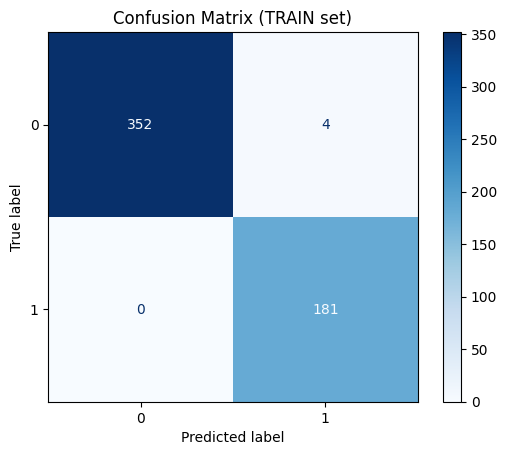

ROC curve plot saved to: plots/roc_curve_xbg_class_weight_train.png


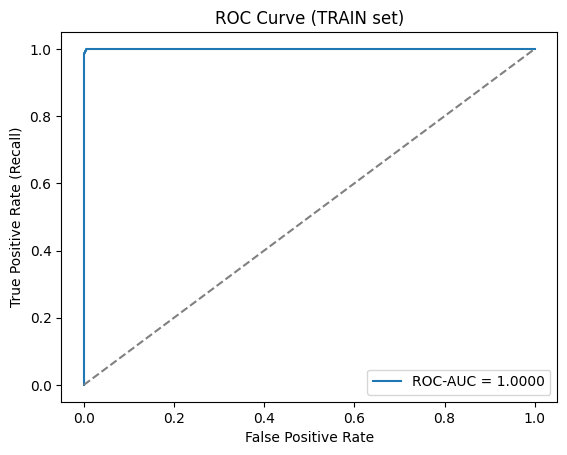

accuracy,▁
mcc,▁
pr_auc,▁
precision_diabetic,▁
precision_non_diabetic,▁
recall_diabetic,▁
recall_non_diabetic,▁
roc_auc,▁
accuracy,0.99255
dataset_split,train
mcc,0.98356


=== Best Parameters ===

{'xgb__colsample_bytree': 0.8, 'xgb__learning_rate': np.float64(0.10961668801147863), 'xgb__max_depth': 7, 'xgb__n_estimators': 148, 'xgb__subsample': 0.6} 


Results (VAL set):
=== Classification Report ===
              precision    recall  f1-score   support

Non-diabetic       0.68      0.79      0.73        68
    Diabetic       0.60      0.45      0.51        47

    accuracy                           0.65       115
   macro avg       0.64      0.62      0.62       115
weighted avg       0.64      0.65      0.64       115

=== Extra Metrics ===
Accuracy: 65.2174%
ROC-AUC: 0.6937
PR-AUC (Average Precision): 0.5742
MCC: 0.2574
Confusion matrix plot saved to: plots/confusion_matrix_xbg_class_weight_val.png


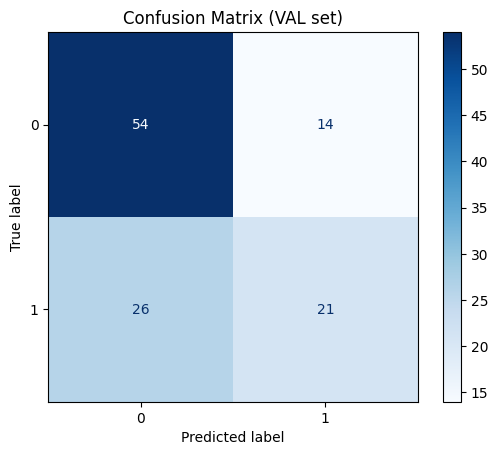

ROC curve plot saved to: plots/roc_curve_xbg_class_weight_val.png


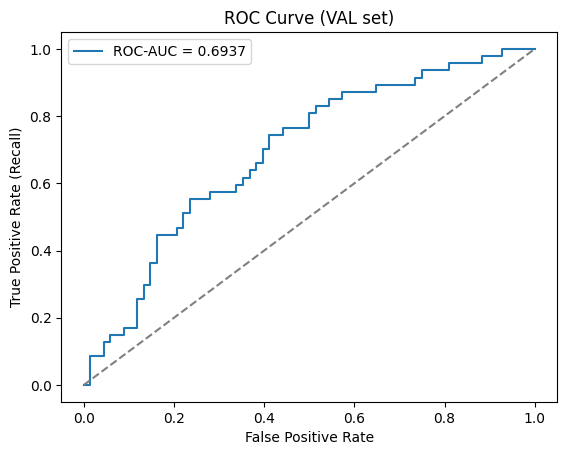

accuracy,▁
mcc,▁
pr_auc,▁
precision_diabetic,▁
precision_non_diabetic,▁
recall_diabetic,▁
recall_non_diabetic,▁
roc_auc,▁
accuracy,0.65217
dataset_split,val
mcc,0.2574


{'best_params': {'xgb__colsample_bytree': 0.8,
  'xgb__learning_rate': np.float64(0.10961668801147863),
  'xgb__max_depth': 7,
  'xgb__n_estimators': 148,
  'xgb__subsample': 0.6},
 'accuracy': 0.6521739130434783,
 'roc_auc': np.float64(0.6936795994993743),
 'pr_auc': np.float64(0.5742112546336934),
 'mcc': np.float64(0.25739987056466906),
 'report': {'Non-diabetic': {'precision': 0.675,
   'recall': 0.7941176470588235,
   'f1-score': 0.7297297297297297,
   'support': 68.0},
  'Diabetic': {'precision': 0.6,
   'recall': 0.44680851063829785,
   'f1-score': 0.5121951219512195,
   'support': 47.0},
  'accuracy': 0.6521739130434783,
  'macro avg': {'precision': 0.6375,
   'recall': 0.6204630788485607,
   'f1-score': 0.6209624258404747,
   'support': 115.0},
  'weighted avg': {'precision': 0.6443478260869566,
   'recall': 0.6521739130434783,
   'f1-score': 0.640824281333295,
   'support': 115.0}},
 'confusion_matrix': array([[54, 14],
        [26, 21]])}

In [ ]:
from xgboost import XGBClassifier

xgb_params = {
    "xgb__n_estimators": randint(100, 300),
    "xgb__max_depth": randint(3, 10),
    "xgb__learning_rate": loguniform(0.01, 0.2),
    "xgb__subsample": [0.6, 0.8, 1.0],
    "xgb__colsample_bytree": [0.6, 0.8, 1.0]
}


xgb_pipeline = Pipeline(steps=[
    ("preprocessing", preprocessing),
    ("xgb", XGBClassifier(objective='binary:logistic',scale_pos_weight=scale_pos_weight))
])

xgb_model = RandomizedSearchCV(estimator= xgb_pipeline, param_distributions=xgb_params, cv=5, n_jobs=-1,random_state=21)
xgb_model.fit(X_train, y_train)


evaluate_binary_classification(
  model= xgb_model,
  X=X_train,
  y= y_train,
  data_split="train",
  model_name="xbg",
  sampling_method="class_weight",

  )
evaluate_binary_classification(
  model= xgb_model,
  X=X_val,
  y=y_val,
  data_split="val",
  model_name="xbg",
  sampling_method="class_weight",
)


### LGBM Classifier (lgbm)

[LightGBM] [Warning] min_gain_to_split is set=0.01, min_split_gain=0.0 will be ignored. Current value: min_gain_to_split=0.01
[LightGBM] [Warning] min_gain_to_split is set=0.01, min_split_gain=0.0 will be ignored. Current value: min_gain_to_split=0.01
[LightGBM] [Info] Number of positive: 181, number of negative: 356
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000049 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 376
[LightGBM] [Info] Number of data points in the train set: 537, number of used features: 5
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=-0.000000
[LightGBM] [Info] Start training from score -0.000000
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further split

=== Best Parameters ===

{'lgbm__learning_rate': np.float64(0.07664315132452595), 'lgbm__max_depth': 14, 'lgbm__min_gain_to_split': 0.01, 'lgbm__n_estimators': 346, 'lgbm__num_leaves': 68} 

[LightGBM] [Warning] min_gain_to_split is set=0.01, min_split_gain=0.0 will be ignored. Current value: min_gain_to_split=0.01
[LightGBM] [Warning] min_gain_to_split is set=0.01, min_split_gain=0.0 will be ignored. Current value: min_gain_to_split=0.01

Results (TRAIN set):
=== Classification Report ===
              precision    recall  f1-score   support

Non-diabetic       1.00      1.00      1.00       356
    Diabetic       1.00      1.00      1.00       181

    accuracy                           1.00       537
   macro avg       1.00      1.00      1.00       537
weighted avg       1.00      1.00      1.00       537

=== Extra Metrics ===
Accuracy: 100.0000%
ROC-AUC: 1.0000
PR-AUC (Average Precision): 1.0000
MCC: 1.0000


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


Confusion matrix plot saved to: plots/confusion_matrix_lgbm_class_weight_train.png


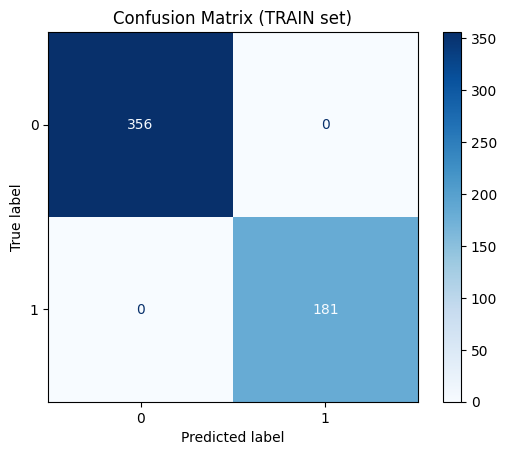

ROC curve plot saved to: plots/roc_curve_lgbm_class_weight_train.png


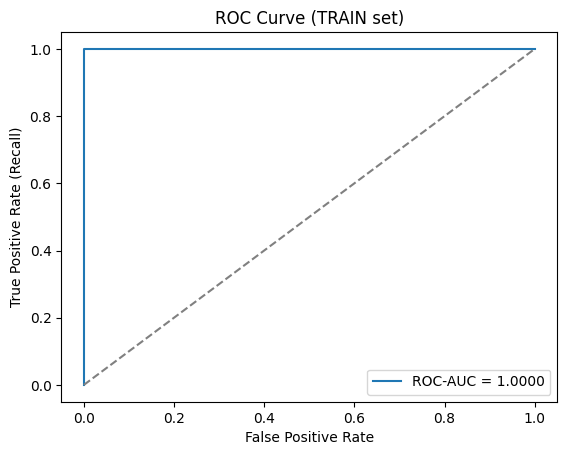

accuracy,▁
mcc,▁
pr_auc,▁
precision_diabetic,▁
precision_non_diabetic,▁
recall_diabetic,▁
recall_non_diabetic,▁
roc_auc,▁
accuracy,1
dataset_split,train
mcc,1


=== Best Parameters ===

{'lgbm__learning_rate': np.float64(0.07664315132452595), 'lgbm__max_depth': 14, 'lgbm__min_gain_to_split': 0.01, 'lgbm__n_estimators': 346, 'lgbm__num_leaves': 68} 

[LightGBM] [Warning] min_gain_to_split is set=0.01, min_split_gain=0.0 will be ignored. Current value: min_gain_to_split=0.01
[LightGBM] [Warning] min_gain_to_split is set=0.01, min_split_gain=0.0 will be ignored. Current value: min_gain_to_split=0.01

Results (VAL set):
=== Classification Report ===
              precision    recall  f1-score   support

Non-diabetic       0.67      0.79      0.72        68
    Diabetic       0.59      0.43      0.49        47

    accuracy                           0.64       115
   macro avg       0.63      0.61      0.61       115
weighted avg       0.63      0.64      0.63       115

=== Extra Metrics ===
Accuracy: 64.3478%
ROC-AUC: 0.7128
PR-AUC (Average Precision): 0.5768
MCC: 0.2366
Confusion matrix plot saved to: plots/confusion_matrix_lgbm_class_weight_val

/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


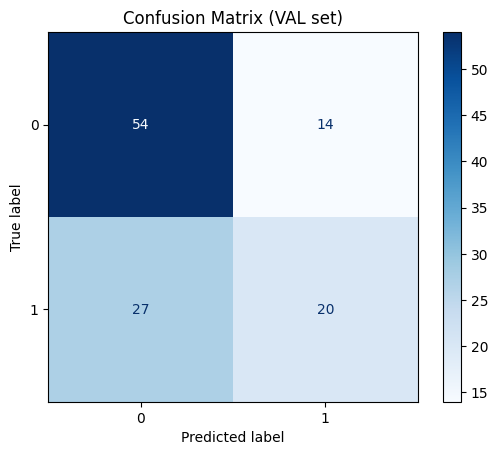

ROC curve plot saved to: plots/roc_curve_lgbm_class_weight_val.png


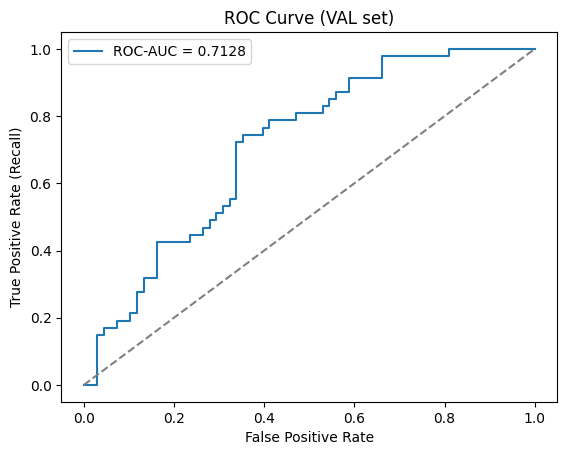

accuracy,▁
mcc,▁
pr_auc,▁
precision_diabetic,▁
precision_non_diabetic,▁
recall_diabetic,▁
recall_non_diabetic,▁
roc_auc,▁
accuracy,0.64348
dataset_split,val
mcc,0.23662


{'best_params': {'lgbm__learning_rate': np.float64(0.07664315132452595),
  'lgbm__max_depth': 14,
  'lgbm__min_gain_to_split': 0.01,
  'lgbm__n_estimators': 346,
  'lgbm__num_leaves': 68},
 'accuracy': 0.6434782608695652,
 'roc_auc': np.float64(0.7127659574468085),
 'pr_auc': np.float64(0.5767526999761567),
 'mcc': np.float64(0.23662016825937024),
 'report': {'Non-diabetic': {'precision': 0.6666666666666666,
   'recall': 0.7941176470588235,
   'f1-score': 0.7248322147651006,
   'support': 68.0},
  'Diabetic': {'precision': 0.5882352941176471,
   'recall': 0.425531914893617,
   'f1-score': 0.49382716049382713,
   'support': 47.0},
  'accuracy': 0.6434782608695652,
  'macro avg': {'precision': 0.6274509803921569,
   'recall': 0.6098247809762203,
   'f1-score': 0.6093296876294638,
   'support': 115.0},
  'weighted avg': {'precision': 0.6346121057118499,
   'recall': 0.6434782608695652,
   'f1-score': 0.6304214534542324,
   'support': 115.0}},
 'confusion_matrix': array([[54, 14],
        

In [ ]:
from lightgbm import LGBMClassifier

lgbm_params = {
    "lgbm__n_estimators": randint(100, 400),
    "lgbm__max_depth": randint(5, 15),
    "lgbm__num_leaves": randint(20, 100),
    "lgbm__learning_rate": loguniform(0.05, 0.2),
    "lgbm__min_gain_to_split": [0.0, 0.01]
}


lgbm_pipeline = Pipeline(steps=[
    ("preprocessing", preprocessing),
    ("lgbm", LGBMClassifier(class_weight="balanced"))
])

lgbm_model = RandomizedSearchCV(estimator= lgbm_pipeline, param_distributions=lgbm_params, cv=5, n_jobs=-1,random_state=21)
lgbm_model.fit(X_train, y_train)

evaluate_binary_classification(
  model= lgbm_model,
  X=X_train,
  y= y_train,
  data_split="train",
  model_name="lgbm",
  sampling_method="class_weight",

  )
evaluate_binary_classification(
  model= lgbm_model,
  X=X_val,
  y=y_val,
  data_split="val",
  model_name="lgbm",
  sampling_method="class_weight",
)

### CatBoost Classifier (cat)

0:	learn: 0.6663338	total: 50.3ms	remaining: 14.9s
1:	learn: 0.6402617	total: 54.2ms	remaining: 8.02s
2:	learn: 0.6180546	total: 57.3ms	remaining: 5.64s
3:	learn: 0.5991725	total: 60.1ms	remaining: 4.42s
4:	learn: 0.5863125	total: 63.2ms	remaining: 3.7s
5:	learn: 0.5761883	total: 64.8ms	remaining: 3.15s
6:	learn: 0.5655525	total: 68.7ms	remaining: 2.85s
7:	learn: 0.5509470	total: 72ms	remaining: 2.61s
8:	learn: 0.5403432	total: 75.9ms	remaining: 2.44s
9:	learn: 0.5281251	total: 79.1ms	remaining: 2.28s
10:	learn: 0.5210922	total: 83.1ms	remaining: 2.17s
11:	learn: 0.5120146	total: 86.4ms	remaining: 2.06s
12:	learn: 0.5030623	total: 88ms	remaining: 1.93s
13:	learn: 0.4979731	total: 91.8ms	remaining: 1.86s
14:	learn: 0.4910779	total: 95.1ms	remaining: 1.79s
15:	learn: 0.4844936	total: 98.8ms	remaining: 1.74s
16:	learn: 0.4782216	total: 102ms	remaining: 1.68s
17:	learn: 0.4725810	total: 105ms	remaining: 1.63s
18:	learn: 0.4661279	total: 108ms	remaining: 1.58s
19:	learn: 0.4622354	total: 11

=== Best Parameters ===

{'cat__depth': 6, 'cat__iterations': 298, 'cat__l2_leaf_reg': 3, 'cat__learning_rate': np.float64(0.06514301558220145)} 


Results (TRAIN set):
=== Classification Report ===
              precision    recall  f1-score   support

Non-diabetic       1.00      0.97      0.99       356
    Diabetic       0.95      1.00      0.97       181

    accuracy                           0.98       537
   macro avg       0.97      0.99      0.98       537
weighted avg       0.98      0.98      0.98       537

=== Extra Metrics ===
Accuracy: 98.1378%
ROC-AUC: 0.9980
PR-AUC (Average Precision): 0.9940
MCC: 0.9597
Confusion matrix plot saved to: plots/confusion_matrix_cat_class_weight_train.png


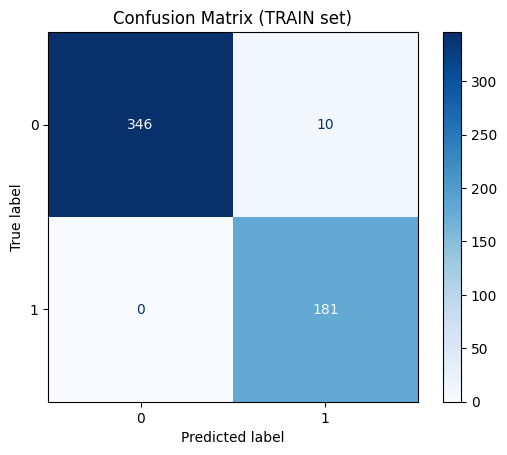

ROC curve plot saved to: plots/roc_curve_cat_class_weight_train.png


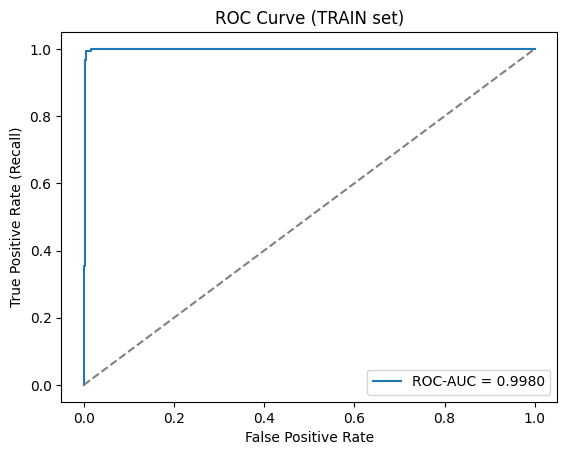

accuracy,▁
mcc,▁
pr_auc,▁
precision_diabetic,▁
precision_non_diabetic,▁
recall_diabetic,▁
recall_non_diabetic,▁
roc_auc,▁
accuracy,0.98138
dataset_split,train
mcc,0.9597


=== Best Parameters ===

{'cat__depth': 6, 'cat__iterations': 298, 'cat__l2_leaf_reg': 3, 'cat__learning_rate': np.float64(0.06514301558220145)} 


Results (VAL set):
=== Classification Report ===
              precision    recall  f1-score   support

Non-diabetic       0.68      0.85      0.76        68
    Diabetic       0.67      0.43      0.52        47

    accuracy                           0.68       115
   macro avg       0.67      0.64      0.64       115
weighted avg       0.68      0.68      0.66       115

=== Extra Metrics ===
Accuracy: 67.8261%
ROC-AUC: 0.7171
PR-AUC (Average Precision): 0.6083
MCC: 0.3118
Confusion matrix plot saved to: plots/confusion_matrix_cat_class_weight_val.png


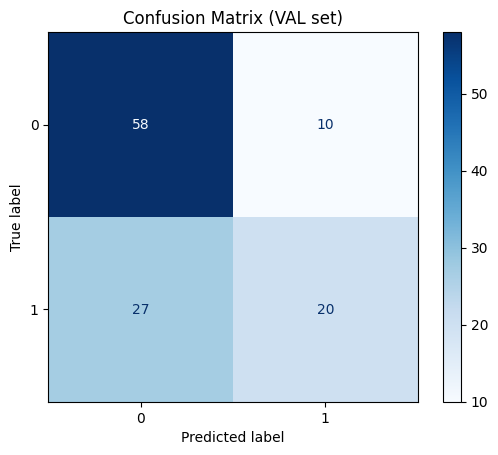

ROC curve plot saved to: plots/roc_curve_cat_class_weight_val.png


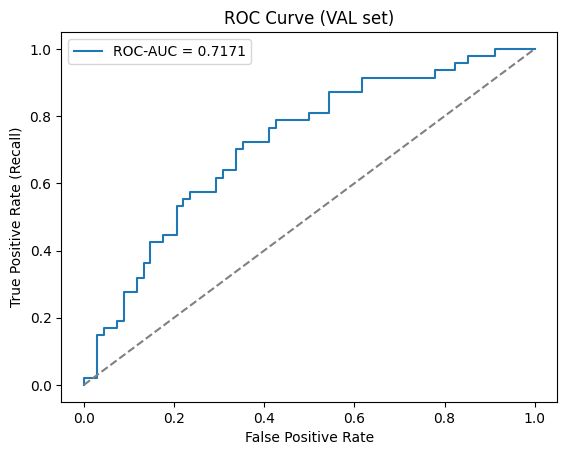

accuracy,▁
mcc,▁
pr_auc,▁
precision_diabetic,▁
precision_non_diabetic,▁
recall_diabetic,▁
recall_non_diabetic,▁
roc_auc,▁
accuracy,0.67826
dataset_split,val
mcc,0.31176


{'best_params': {'cat__depth': 6,
  'cat__iterations': 298,
  'cat__l2_leaf_reg': 3,
  'cat__learning_rate': np.float64(0.06514301558220145)},
 'accuracy': 0.6782608695652174,
 'roc_auc': np.float64(0.7171464330413017),
 'pr_auc': np.float64(0.6083122301699978),
 'mcc': np.float64(0.3117572278918342),
 'report': {'Non-diabetic': {'precision': 0.6823529411764706,
   'recall': 0.8529411764705882,
   'f1-score': 0.7581699346405228,
   'support': 68.0},
  'Diabetic': {'precision': 0.6666666666666666,
   'recall': 0.425531914893617,
   'f1-score': 0.5194805194805194,
   'support': 47.0},
  'accuracy': 0.6782608695652174,
  'macro avg': {'precision': 0.6745098039215687,
   'recall': 0.6392365456821026,
   'f1-score': 0.6388252270605211,
   'support': 115.0},
  'weighted avg': {'precision': 0.6759420289855073,
   'recall': 0.6782608695652174,
   'f1-score': 0.6606186084446953,
   'support': 115.0}},
 'confusion_matrix': array([[58, 10],
        [27, 20]])}

In [ ]:
from catboost import CatBoostClassifier

cat_params = {
    "cat__iterations": randint(100, 300),
    "cat__depth": randint(4, 10),
    "cat__learning_rate": loguniform(0.03, 0.2),
    "cat__l2_leaf_reg": randint(1, 10)
}

cat_pipeline = Pipeline(steps=[
    ("preprocessing", preprocessing),
    ("cat", CatBoostClassifier(auto_class_weights='Balanced'))
])

cat_model = RandomizedSearchCV(estimator= cat_pipeline, param_distributions=cat_params, cv=5, n_jobs=-1,random_state=21)
cat_model.fit(X_train, y_train, cat__sample_weight=sample_weight)

evaluate_binary_classification(
  model= cat_model,
  X=X_train,
  y= y_train,
  data_split="train",
  model_name="cat",
  sampling_method="class_weight",

  )
evaluate_binary_classification(
  model= cat_model,
  X=X_val,
  y=y_val,
  data_split="val",
  model_name="cat",
  sampling_method="class_weight",
)

### Stacking Classifier (stack)

/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[LightGBM] [Warning] min_gain_to_split is set=0.01, min_split_gain=0.0 will be ignored. Current value: min_gain_to_split=0.01
[LightGBM] [Warning] min_gain_to_split is set=0.01, min_split_gain=0.0 will be ignored. Current value: min_gain_to_split=0.01

Results (TRAIN set):
=== Classification Report ===
              precision    recall  f1-score   support

Non-diabetic       0.81      0.93      0.86       356
    Diabetic       0.80      0.57      0.66       181

    accuracy                           0.81       537
   macro avg       0.80      0.75      0.76       537
weighted avg       0.81      0.81      0.80       537

=== Extra Metrics ===
Accuracy: 80.6331%
ROC-AUC: 0.8648
PR-AUC (Average Precision): 0.7875
MCC: 0.5488
Confusion matrix plot saved to: plots/confusion_matrix_stack_class_weight_train.png


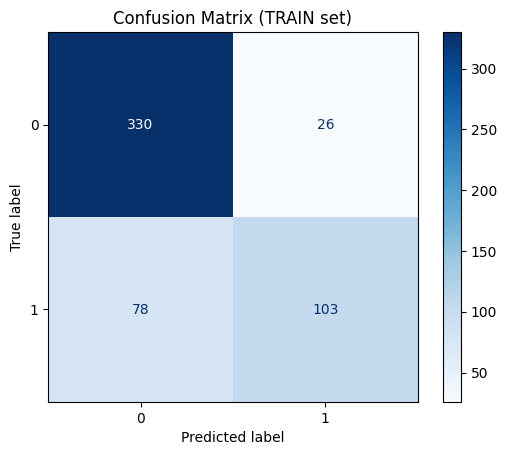

ROC curve plot saved to: plots/roc_curve_stack_class_weight_train.png


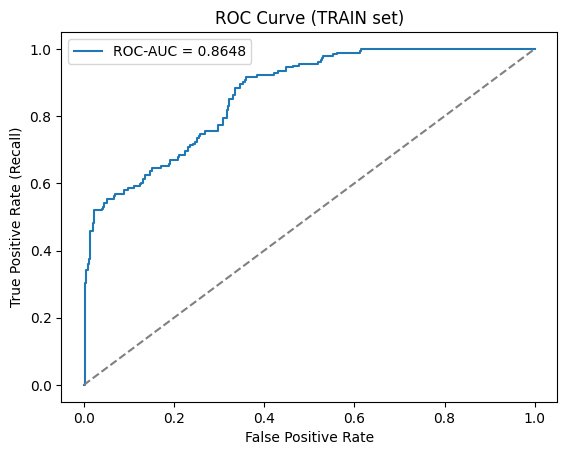

accuracy,▁
mcc,▁
pr_auc,▁
precision_diabetic,▁
precision_non_diabetic,▁
recall_diabetic,▁
recall_non_diabetic,▁
roc_auc,▁
accuracy,0.80633
dataset_split,train
mcc,0.54884


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[LightGBM] [Warning] min_gain_to_split is set=0.01, min_split_gain=0.0 will be ignored. Current value: min_gain_to_split=0.01
[LightGBM] [Warning] min_gain_to_split is set=0.01, min_split_gain=0.0 will be ignored. Current value: min_gain_to_split=0.01

Results (VAL set):
=== Classification Report ===
              precision    recall  f1-score   support

Non-diabetic       0.66      0.84      0.74        68
    Diabetic       0.61      0.36      0.45        47

    accuracy                           0.64       115
   macro avg       0.63      0.60      0.59       115
weighted avg       0.64      0.64      0.62       115

=== Extra Metrics ===
Accuracy: 64.3478%
ROC-AUC: 0.7342
PR-AUC (Average Precision): 0.5816
MCC: 0.2290
Confusion matrix plot saved to: plots/confusion_matrix_stack_class_weight_val.png


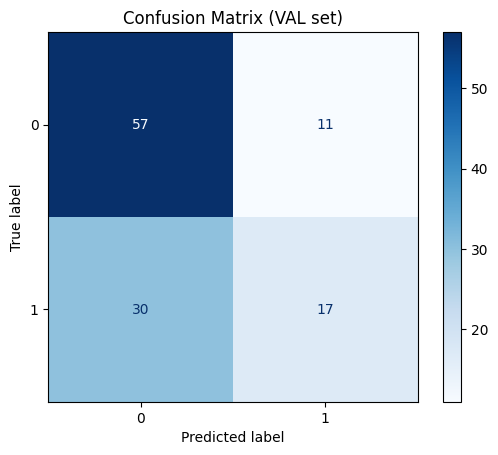

ROC curve plot saved to: plots/roc_curve_stack_class_weight_val.png


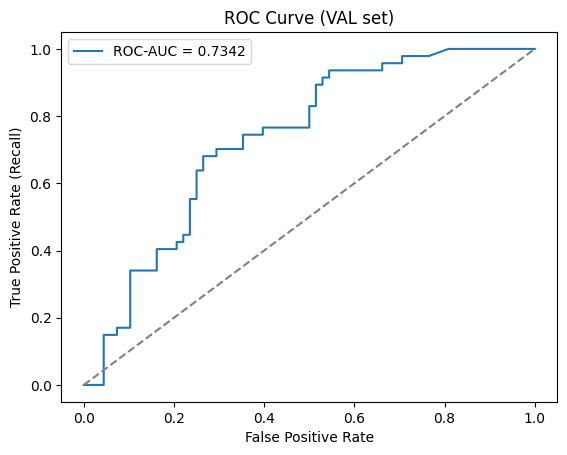

accuracy,▁
mcc,▁
pr_auc,▁
precision_diabetic,▁
precision_non_diabetic,▁
recall_diabetic,▁
recall_non_diabetic,▁
roc_auc,▁
accuracy,0.64348
dataset_split,val
mcc,0.22901


{'best_params': {},
 'accuracy': 0.6434782608695652,
 'roc_auc': np.float64(0.7341989987484356),
 'pr_auc': np.float64(0.5816188374749787),
 'mcc': np.float64(0.22901231181691803),
 'report': {'Non-diabetic': {'precision': 0.6551724137931034,
   'recall': 0.8382352941176471,
   'f1-score': 0.7354838709677419,
   'support': 68.0},
  'Diabetic': {'precision': 0.6071428571428571,
   'recall': 0.3617021276595745,
   'f1-score': 0.4533333333333333,
   'support': 47.0},
  'accuracy': 0.6434782608695652,
  'macro avg': {'precision': 0.6311576354679802,
   'recall': 0.5999687108886108,
   'f1-score': 0.5944086021505376,
   'support': 115.0},
  'weighted avg': {'precision': 0.6355429428143071,
   'recall': 0.6434782608695652,
   'f1-score': 0.620170172978027,
   'support': 115.0}},
 'confusion_matrix': array([[57, 11],
        [30, 17]])}

In [ ]:
from sklearn.ensemble import StackingClassifier, GradientBoostingClassifier

rf = rf_model.best_estimator_
lgbm = lgbm_model.best_estimator_
knn = knn_model.best_estimator_
log_reg = log_reg_model.best_estimator_
cat = cat_model.best_estimator_

stack_model = StackingClassifier(
    estimators=[
        ("rf", rf),
        ("lgbm", lgbm),
        ("knn", knn),
        ("log_reg", log_reg),
        ("cat", cat),
    ],
    final_estimator=GradientBoostingClassifier(random_state=21),
    cv=5,
    n_jobs=-1,

)

stack_model.fit(X_train, y_train)

evaluate_binary_classification(model=stack_model,X= X_train,y= y_train,data_split="train", model_name="stack",sampling_method="class_weight")
evaluate_binary_classification(model=stack_model,X= X_val,y= y_val,data_split="val", model_name="stack",sampling_method="class_weight",)

## 5- balanced Dataset



==================== SMOTE ====================

----- Training DecisionTree with SMOTE -----


=== Best Parameters ===

{'dt__criterion': 'entropy', 'dt__max_depth': 17, 'dt__min_samples_split': 2} 


Results (TRAIN set):
=== Classification Report ===
              precision    recall  f1-score   support

Non-diabetic       0.98      1.00      0.99       356
    Diabetic       1.00      0.97      0.99       356

    accuracy                           0.99       712
   macro avg       0.99      0.99      0.99       712
weighted avg       0.99      0.99      0.99       712

=== Extra Metrics ===
Accuracy: 98.5955%
ROC-AUC: 0.9994
PR-AUC (Average Precision): 0.9991
MCC: 0.9722
Confusion matrix plot saved to: plots/confusion_matrix_DecisionTree_SMOTE_train.png


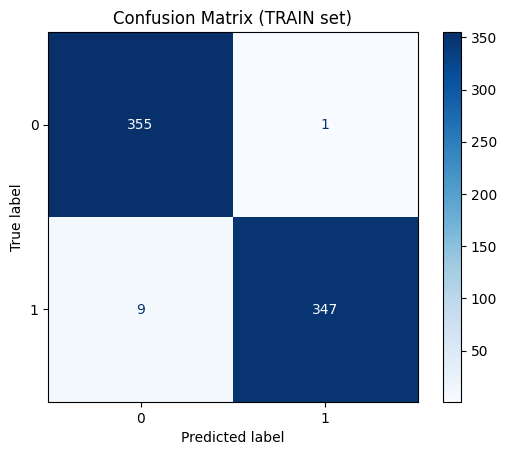

ROC curve plot saved to: plots/roc_curve_DecisionTree_SMOTE_train.png


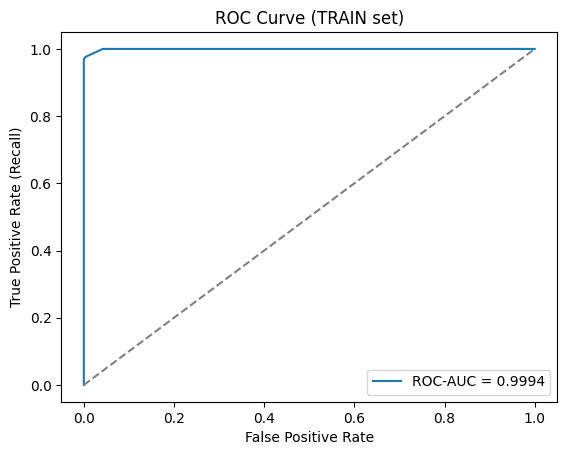

accuracy,▁
mcc,▁
pr_auc,▁
precision_diabetic,▁
precision_non_diabetic,▁
recall_diabetic,▁
recall_non_diabetic,▁
roc_auc,▁
accuracy,0.98596
dataset_split,train
mcc,0.97216


=== Best Parameters ===

{'dt__criterion': 'entropy', 'dt__max_depth': 17, 'dt__min_samples_split': 2} 


Results (VAL set):
=== Classification Report ===
              precision    recall  f1-score   support

Non-diabetic       0.74      0.78      0.76        68
    Diabetic       0.65      0.60      0.62        47

    accuracy                           0.70       115
   macro avg       0.69      0.69      0.69       115
weighted avg       0.70      0.70      0.70       115

=== Extra Metrics ===
Accuracy: 70.4348%
ROC-AUC: 0.6876
PR-AUC (Average Precision): 0.5531
MCC: 0.3812
Confusion matrix plot saved to: plots/confusion_matrix_DecisionTree_SMOTE_val.png


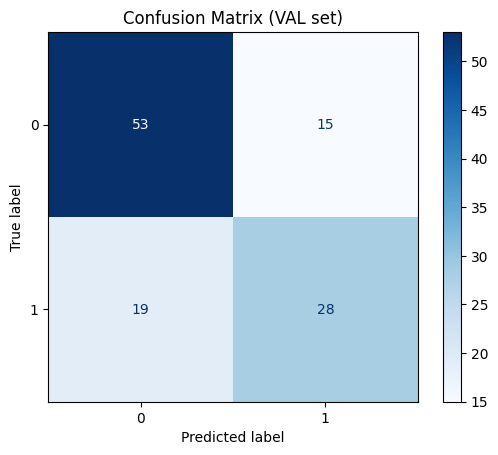

ROC curve plot saved to: plots/roc_curve_DecisionTree_SMOTE_val.png


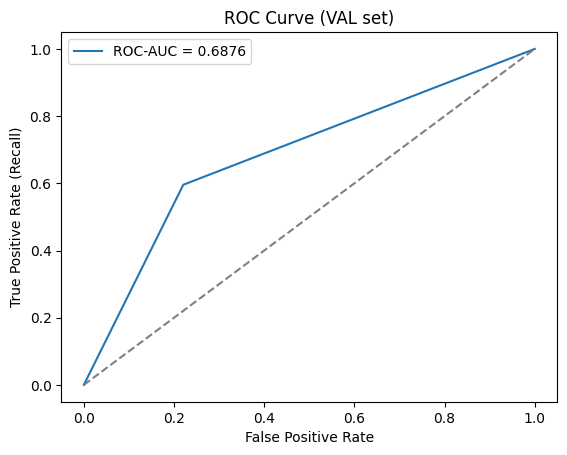

accuracy,▁
mcc,▁
pr_auc,▁
precision_diabetic,▁
precision_non_diabetic,▁
recall_diabetic,▁
recall_non_diabetic,▁
roc_auc,▁
accuracy,0.70435
dataset_split,val
mcc,0.38117



----- Training KNN with SMOTE -----


=== Best Parameters ===

{'knn__n_neighbors': 5, 'knn__p': 2, 'knn__weights': 'distance'} 


Results (TRAIN set):
=== Classification Report ===
              precision    recall  f1-score   support

Non-diabetic       1.00      1.00      1.00       356
    Diabetic       1.00      1.00      1.00       356

    accuracy                           1.00       712
   macro avg       1.00      1.00      1.00       712
weighted avg       1.00      1.00      1.00       712

=== Extra Metrics ===
Accuracy: 100.0000%
ROC-AUC: 1.0000
PR-AUC (Average Precision): 1.0000
MCC: 1.0000
Confusion matrix plot saved to: plots/confusion_matrix_KNN_SMOTE_train.png


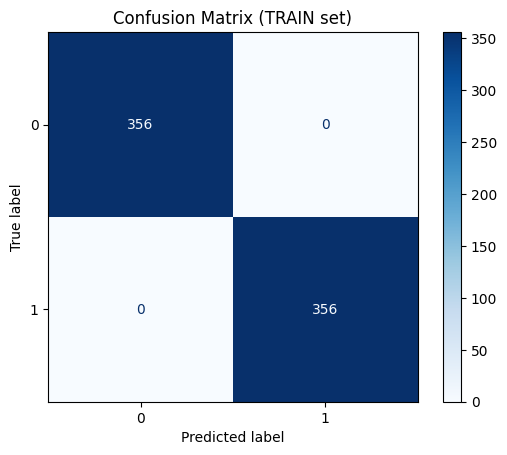

ROC curve plot saved to: plots/roc_curve_KNN_SMOTE_train.png


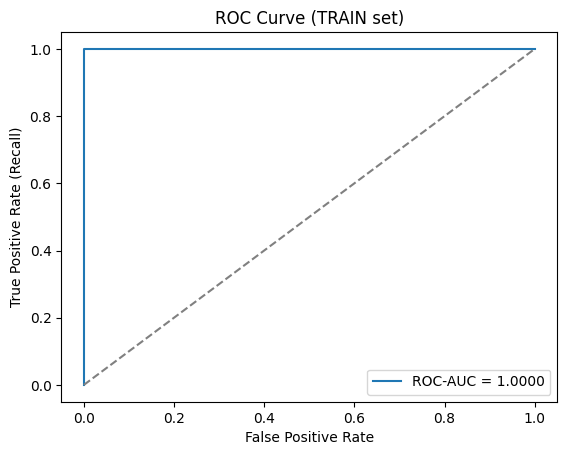

accuracy,▁
mcc,▁
pr_auc,▁
precision_diabetic,▁
precision_non_diabetic,▁
recall_diabetic,▁
recall_non_diabetic,▁
roc_auc,▁
accuracy,1
dataset_split,train
mcc,1


=== Best Parameters ===

{'knn__n_neighbors': 5, 'knn__p': 2, 'knn__weights': 'distance'} 


Results (VAL set):
=== Classification Report ===
              precision    recall  f1-score   support

Non-diabetic       0.69      0.82      0.75        68
    Diabetic       0.65      0.47      0.54        47

    accuracy                           0.68       115
   macro avg       0.67      0.65      0.65       115
weighted avg       0.67      0.68      0.67       115

=== Extra Metrics ===
Accuracy: 67.8261%
ROC-AUC: 0.7064
PR-AUC (Average Precision): 0.6078
MCC: 0.3141
Confusion matrix plot saved to: plots/confusion_matrix_KNN_SMOTE_val.png


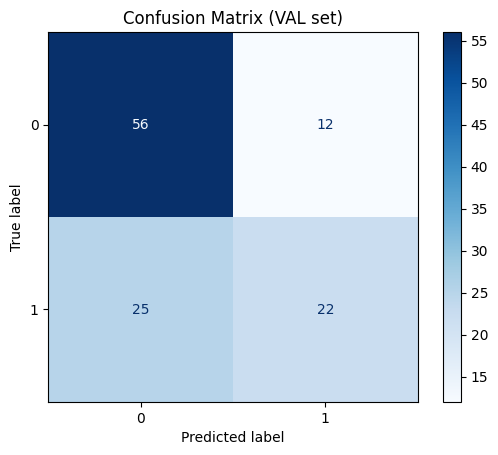

ROC curve plot saved to: plots/roc_curve_KNN_SMOTE_val.png


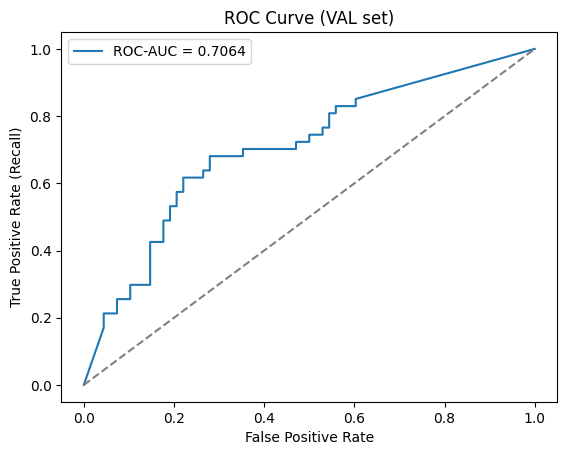

accuracy,▁
mcc,▁
pr_auc,▁
precision_diabetic,▁
precision_non_diabetic,▁
recall_diabetic,▁
recall_non_diabetic,▁
roc_auc,▁
accuracy,0.67826
dataset_split,val
mcc,0.31415



----- Training RandomForest with SMOTE -----


=== Best Parameters ===

{'rf__bootstrap': True, 'rf__max_depth': 19, 'rf__min_samples_split': 2, 'rf__n_estimators': 263} 


Results (TRAIN set):
=== Classification Report ===
              precision    recall  f1-score   support

Non-diabetic       1.00      1.00      1.00       356
    Diabetic       1.00      1.00      1.00       356

    accuracy                           1.00       712
   macro avg       1.00      1.00      1.00       712
weighted avg       1.00      1.00      1.00       712

=== Extra Metrics ===
Accuracy: 100.0000%
ROC-AUC: 1.0000
PR-AUC (Average Precision): 1.0000
MCC: 1.0000
Confusion matrix plot saved to: plots/confusion_matrix_RandomForest_SMOTE_train.png


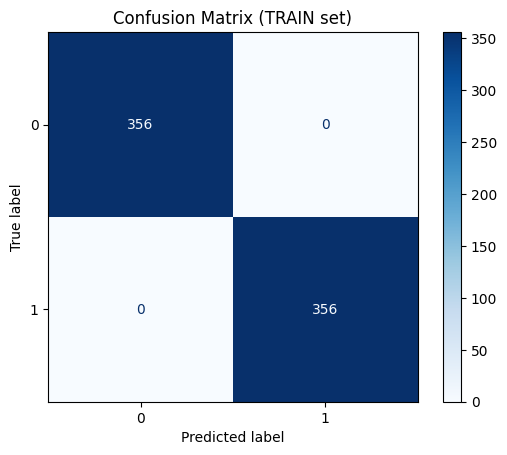

ROC curve plot saved to: plots/roc_curve_RandomForest_SMOTE_train.png


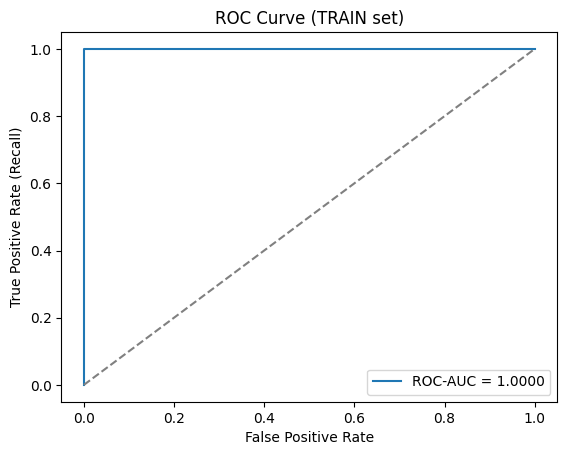

accuracy,▁
mcc,▁
pr_auc,▁
precision_diabetic,▁
precision_non_diabetic,▁
recall_diabetic,▁
recall_non_diabetic,▁
roc_auc,▁
accuracy,1
dataset_split,train
mcc,1


=== Best Parameters ===

{'rf__bootstrap': True, 'rf__max_depth': 19, 'rf__min_samples_split': 2, 'rf__n_estimators': 263} 


Results (VAL set):
=== Classification Report ===
              precision    recall  f1-score   support

Non-diabetic       0.68      0.85      0.76        68
    Diabetic       0.67      0.43      0.52        47

    accuracy                           0.68       115
   macro avg       0.67      0.64      0.64       115
weighted avg       0.68      0.68      0.66       115

=== Extra Metrics ===
Accuracy: 67.8261%
ROC-AUC: 0.7370
PR-AUC (Average Precision): 0.6087
MCC: 0.3118
Confusion matrix plot saved to: plots/confusion_matrix_RandomForest_SMOTE_val.png


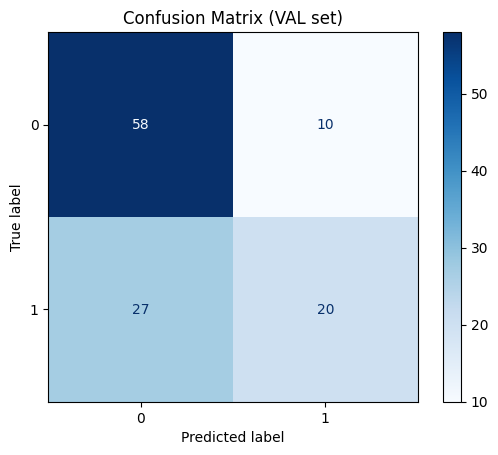

ROC curve plot saved to: plots/roc_curve_RandomForest_SMOTE_val.png


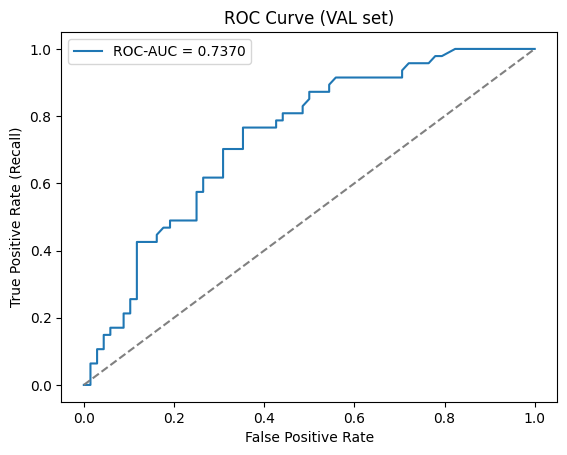

accuracy,▁
mcc,▁
pr_auc,▁
precision_diabetic,▁
precision_non_diabetic,▁
recall_diabetic,▁
recall_non_diabetic,▁
roc_auc,▁
accuracy,0.67826
dataset_split,val
mcc,0.31176




==================== ADASYN ====================

----- Training DecisionTree with ADASYN -----


=== Best Parameters ===

{'dt__criterion': 'log_loss', 'dt__max_depth': 18, 'dt__min_samples_split': 8} 


Results (TRAIN set):
=== Classification Report ===
              precision    recall  f1-score   support

Non-diabetic       0.95      0.92      0.93       356
    Diabetic       0.92      0.95      0.94       352

    accuracy                           0.94       708
   macro avg       0.94      0.94      0.94       708
weighted avg       0.94      0.94      0.94       708

=== Extra Metrics ===
Accuracy: 93.5028%
ROC-AUC: 0.9874
PR-AUC (Average Precision): 0.9852
MCC: 0.8708
Confusion matrix plot saved to: plots/confusion_matrix_DecisionTree_ADASYN_train.png


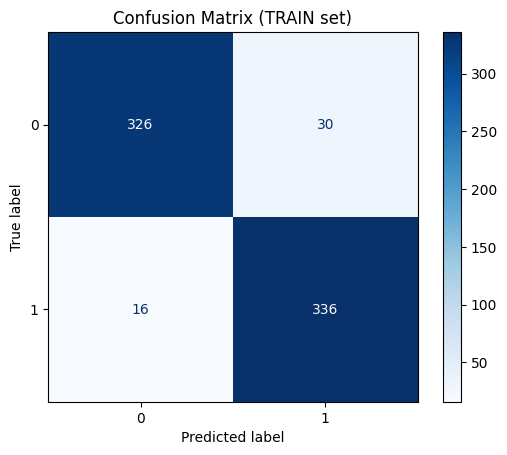

ROC curve plot saved to: plots/roc_curve_DecisionTree_ADASYN_train.png


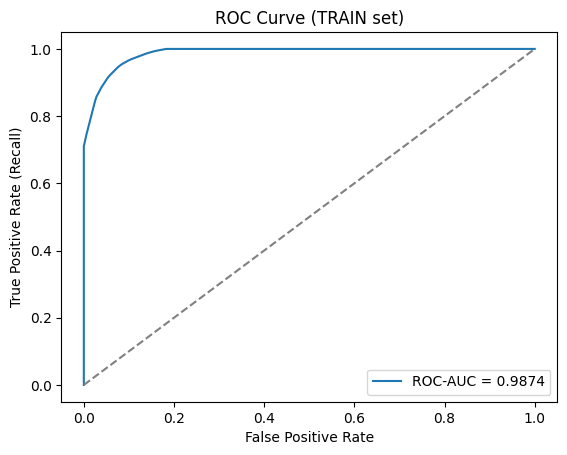

accuracy,▁
mcc,▁
pr_auc,▁
precision_diabetic,▁
precision_non_diabetic,▁
recall_diabetic,▁
recall_non_diabetic,▁
roc_auc,▁
accuracy,0.93503
dataset_split,train
mcc,0.87076


=== Best Parameters ===

{'dt__criterion': 'log_loss', 'dt__max_depth': 18, 'dt__min_samples_split': 8} 


Results (VAL set):
=== Classification Report ===
              precision    recall  f1-score   support

Non-diabetic       0.61      0.63      0.62        68
    Diabetic       0.44      0.43      0.43        47

    accuracy                           0.55       115
   macro avg       0.53      0.53      0.53       115
weighted avg       0.54      0.55      0.55       115

=== Extra Metrics ===
Accuracy: 54.7826%
ROC-AUC: 0.5590
PR-AUC (Average Precision): 0.4332
MCC: 0.0583
Confusion matrix plot saved to: plots/confusion_matrix_DecisionTree_ADASYN_val.png


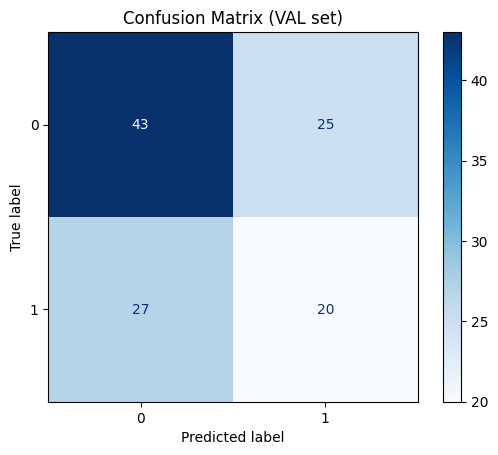

ROC curve plot saved to: plots/roc_curve_DecisionTree_ADASYN_val.png


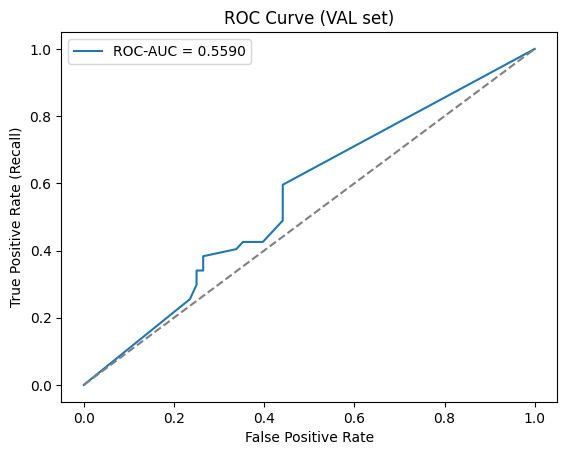

accuracy,▁
mcc,▁
pr_auc,▁
precision_diabetic,▁
precision_non_diabetic,▁
recall_diabetic,▁
recall_non_diabetic,▁
roc_auc,▁
accuracy,0.54783
dataset_split,val
mcc,0.05831



----- Training KNN with ADASYN -----


=== Best Parameters ===

{'knn__n_neighbors': 14, 'knn__p': 1, 'knn__weights': 'distance'} 


Results (TRAIN set):
=== Classification Report ===
              precision    recall  f1-score   support

Non-diabetic       1.00      1.00      1.00       356
    Diabetic       1.00      1.00      1.00       352

    accuracy                           1.00       708
   macro avg       1.00      1.00      1.00       708
weighted avg       1.00      1.00      1.00       708

=== Extra Metrics ===
Accuracy: 100.0000%
ROC-AUC: 1.0000
PR-AUC (Average Precision): 1.0000
MCC: 1.0000
Confusion matrix plot saved to: plots/confusion_matrix_KNN_ADASYN_train.png


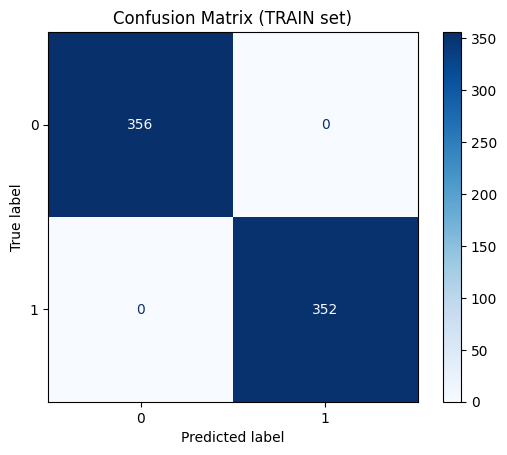

ROC curve plot saved to: plots/roc_curve_KNN_ADASYN_train.png


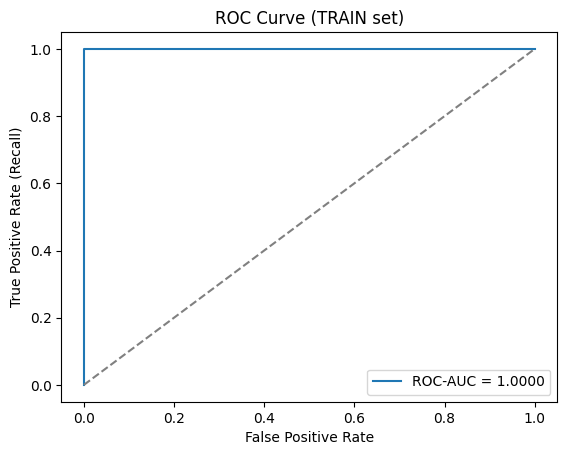

accuracy,▁
mcc,▁
pr_auc,▁
precision_diabetic,▁
precision_non_diabetic,▁
recall_diabetic,▁
recall_non_diabetic,▁
roc_auc,▁
accuracy,1
dataset_split,train
mcc,1


=== Best Parameters ===

{'knn__n_neighbors': 14, 'knn__p': 1, 'knn__weights': 'distance'} 


Results (VAL set):
=== Classification Report ===
              precision    recall  f1-score   support

Non-diabetic       0.75      0.71      0.73        68
    Diabetic       0.61      0.66      0.63        47

    accuracy                           0.69       115
   macro avg       0.68      0.68      0.68       115
weighted avg       0.69      0.69      0.69       115

=== Extra Metrics ===
Accuracy: 68.6957%
ROC-AUC: 0.7293
PR-AUC (Average Precision): 0.6450
MCC: 0.3616
Confusion matrix plot saved to: plots/confusion_matrix_KNN_ADASYN_val.png


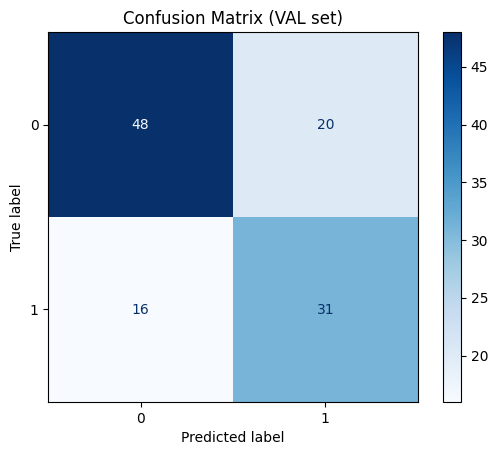

ROC curve plot saved to: plots/roc_curve_KNN_ADASYN_val.png


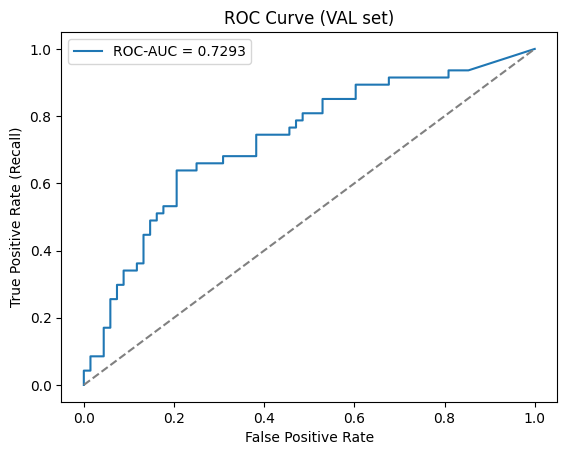

accuracy,▁
mcc,▁
pr_auc,▁
precision_diabetic,▁
precision_non_diabetic,▁
recall_diabetic,▁
recall_non_diabetic,▁
roc_auc,▁
accuracy,0.68696
dataset_split,val
mcc,0.36163



----- Training RandomForest with ADASYN -----


=== Best Parameters ===

{'rf__bootstrap': True, 'rf__max_depth': 15, 'rf__min_samples_split': 4, 'rf__n_estimators': 148} 


Results (TRAIN set):
=== Classification Report ===
              precision    recall  f1-score   support

Non-diabetic       0.99      0.97      0.98       356
    Diabetic       0.97      0.99      0.98       352

    accuracy                           0.98       708
   macro avg       0.98      0.98      0.98       708
weighted avg       0.98      0.98      0.98       708

=== Extra Metrics ===
Accuracy: 98.0226%
ROC-AUC: 0.9992
PR-AUC (Average Precision): 0.9992
MCC: 0.9608
Confusion matrix plot saved to: plots/confusion_matrix_RandomForest_ADASYN_train.png


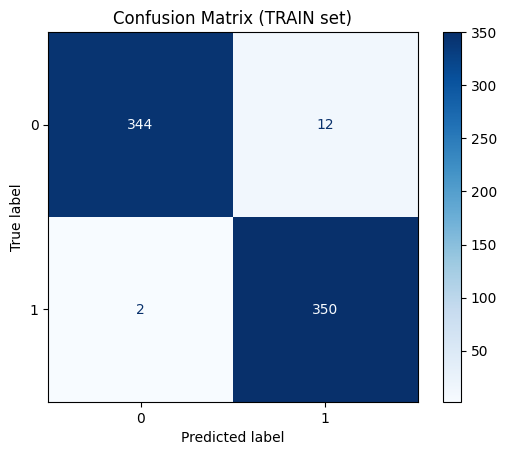

ROC curve plot saved to: plots/roc_curve_RandomForest_ADASYN_train.png


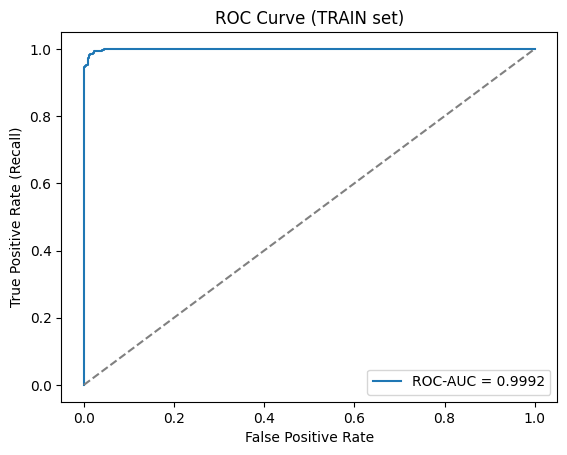

accuracy,▁
mcc,▁
pr_auc,▁
precision_diabetic,▁
precision_non_diabetic,▁
recall_diabetic,▁
recall_non_diabetic,▁
roc_auc,▁
accuracy,0.98023
dataset_split,train
mcc,0.96084


=== Best Parameters ===

{'rf__bootstrap': True, 'rf__max_depth': 15, 'rf__min_samples_split': 4, 'rf__n_estimators': 148} 


Results (VAL set):
=== Classification Report ===
              precision    recall  f1-score   support

Non-diabetic       0.70      0.78      0.74        68
    Diabetic       0.62      0.51      0.56        47

    accuracy                           0.67       115
   macro avg       0.66      0.65      0.65       115
weighted avg       0.66      0.67      0.66       115

=== Extra Metrics ===
Accuracy: 66.9565%
ROC-AUC: 0.7234
PR-AUC (Average Precision): 0.6074
MCC: 0.3012
Confusion matrix plot saved to: plots/confusion_matrix_RandomForest_ADASYN_val.png


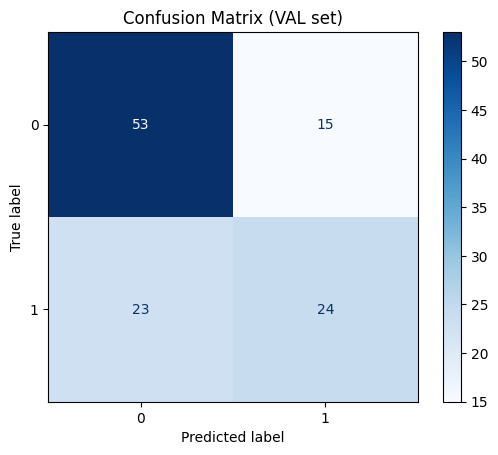

ROC curve plot saved to: plots/roc_curve_RandomForest_ADASYN_val.png


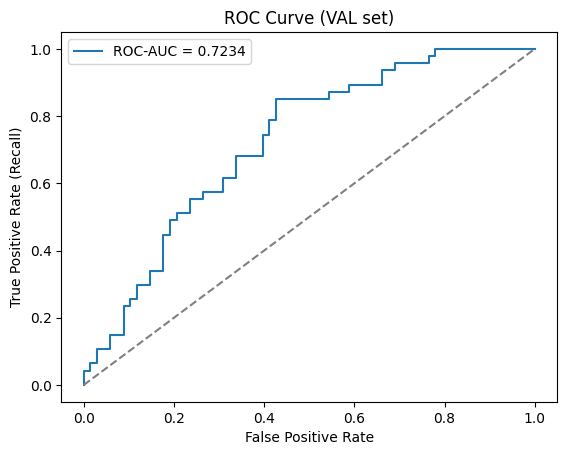

accuracy,▁
mcc,▁
pr_auc,▁
precision_diabetic,▁
precision_non_diabetic,▁
recall_diabetic,▁
recall_non_diabetic,▁
roc_auc,▁
accuracy,0.66957
dataset_split,val
mcc,0.30119




==================== SMOTEN ====================

----- Training DecisionTree with SMOTEN -----


=== Best Parameters ===

{'dt__criterion': 'gini', 'dt__max_depth': 18, 'dt__min_samples_split': 2} 


Results (TRAIN set):
=== Classification Report ===
              precision    recall  f1-score   support

Non-diabetic       1.00      1.00      1.00       356
    Diabetic       1.00      1.00      1.00       356

    accuracy                           1.00       712
   macro avg       1.00      1.00      1.00       712
weighted avg       1.00      1.00      1.00       712

=== Extra Metrics ===
Accuracy: 99.8596%
ROC-AUC: 1.0000
PR-AUC (Average Precision): 1.0000
MCC: 0.9972
Confusion matrix plot saved to: plots/confusion_matrix_DecisionTree_SMOTEN_train.png


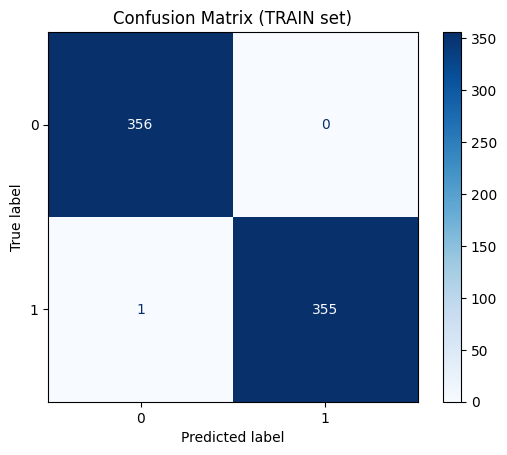

ROC curve plot saved to: plots/roc_curve_DecisionTree_SMOTEN_train.png


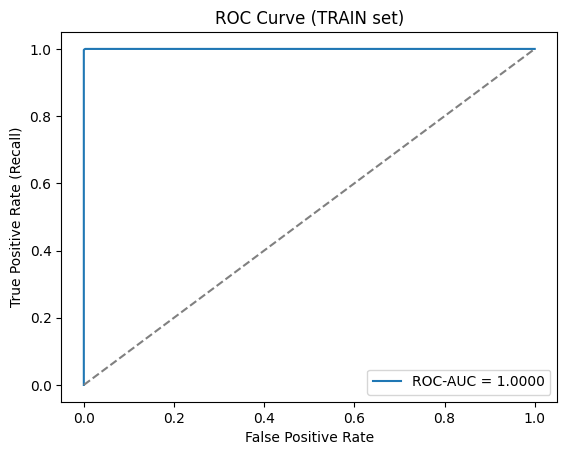

accuracy,▁
mcc,▁
pr_auc,▁
precision_diabetic,▁
precision_non_diabetic,▁
recall_diabetic,▁
recall_non_diabetic,▁
roc_auc,▁
accuracy,0.9986
dataset_split,train
mcc,0.99719


=== Best Parameters ===

{'dt__criterion': 'gini', 'dt__max_depth': 18, 'dt__min_samples_split': 2} 


Results (VAL set):
=== Classification Report ===
              precision    recall  f1-score   support

Non-diabetic       0.60      0.65      0.62        68
    Diabetic       0.43      0.38      0.40        47

    accuracy                           0.54       115
   macro avg       0.52      0.52      0.51       115
weighted avg       0.53      0.54      0.53       115

=== Extra Metrics ===
Accuracy: 53.9130%
ROC-AUC: 0.5219
PR-AUC (Average Precision): 0.4170
MCC: 0.0307
Confusion matrix plot saved to: plots/confusion_matrix_DecisionTree_SMOTEN_val.png


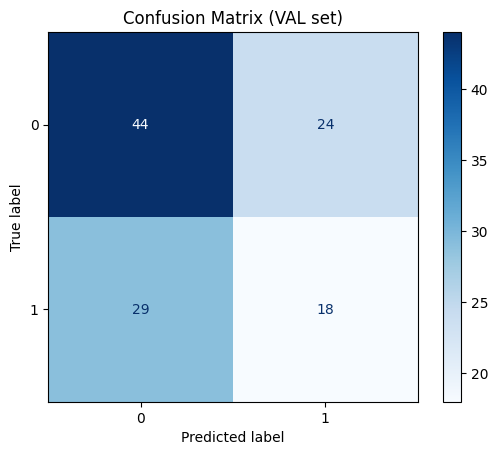

ROC curve plot saved to: plots/roc_curve_DecisionTree_SMOTEN_val.png


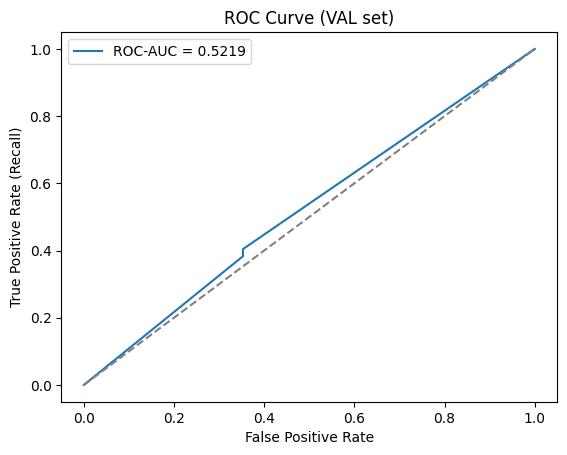

accuracy,▁
mcc,▁
pr_auc,▁
precision_diabetic,▁
precision_non_diabetic,▁
recall_diabetic,▁
recall_non_diabetic,▁
roc_auc,▁
accuracy,0.53913
dataset_split,val
mcc,0.03067



----- Training KNN with SMOTEN -----


=== Best Parameters ===

{'knn__n_neighbors': 14, 'knn__p': 1, 'knn__weights': 'distance'} 


Results (TRAIN set):
=== Classification Report ===
              precision    recall  f1-score   support

Non-diabetic       1.00      1.00      1.00       356
    Diabetic       1.00      1.00      1.00       356

    accuracy                           1.00       712
   macro avg       1.00      1.00      1.00       712
weighted avg       1.00      1.00      1.00       712

=== Extra Metrics ===
Accuracy: 100.0000%
ROC-AUC: 1.0000
PR-AUC (Average Precision): 1.0000
MCC: 1.0000
Confusion matrix plot saved to: plots/confusion_matrix_KNN_SMOTEN_train.png


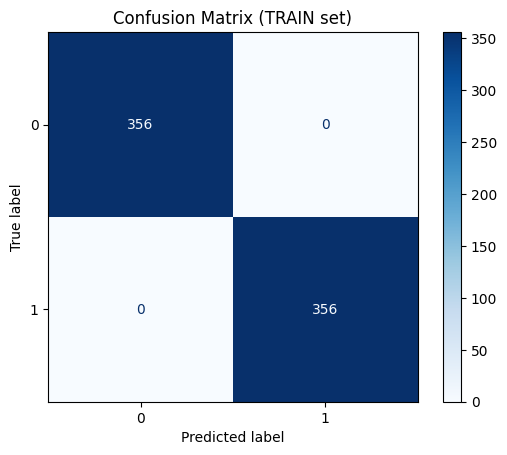

ROC curve plot saved to: plots/roc_curve_KNN_SMOTEN_train.png


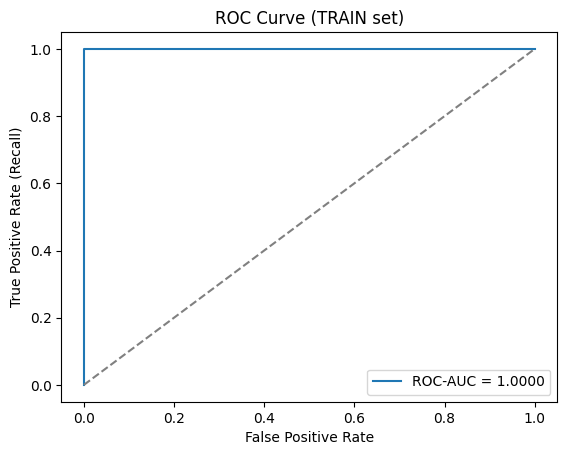

accuracy,▁
mcc,▁
pr_auc,▁
precision_diabetic,▁
precision_non_diabetic,▁
recall_diabetic,▁
recall_non_diabetic,▁
roc_auc,▁
accuracy,1
dataset_split,train
mcc,1


=== Best Parameters ===

{'knn__n_neighbors': 14, 'knn__p': 1, 'knn__weights': 'distance'} 


Results (VAL set):
=== Classification Report ===
              precision    recall  f1-score   support

Non-diabetic       0.71      0.69      0.70        68
    Diabetic       0.57      0.60      0.58        47

    accuracy                           0.65       115
   macro avg       0.64      0.64      0.64       115
weighted avg       0.65      0.65      0.65       115

=== Extra Metrics ===
Accuracy: 65.2174%
ROC-AUC: 0.6798
PR-AUC (Average Precision): 0.6215
MCC: 0.2852
Confusion matrix plot saved to: plots/confusion_matrix_KNN_SMOTEN_val.png


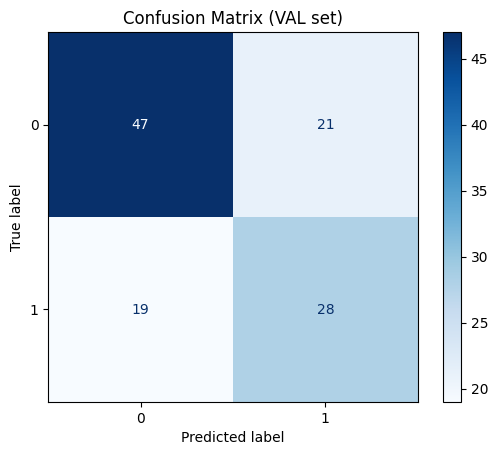

ROC curve plot saved to: plots/roc_curve_KNN_SMOTEN_val.png


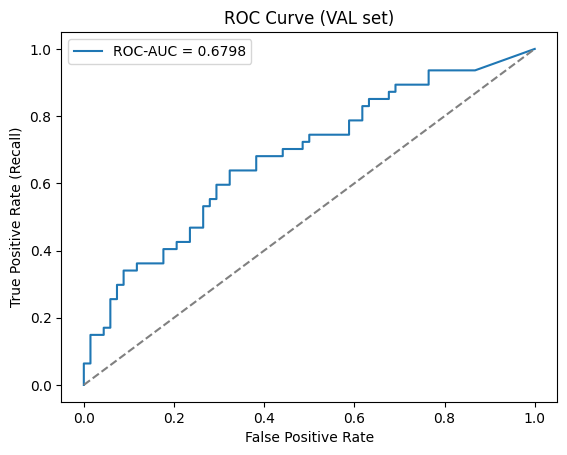

accuracy,▁
mcc,▁
pr_auc,▁
precision_diabetic,▁
precision_non_diabetic,▁
recall_diabetic,▁
recall_non_diabetic,▁
roc_auc,▁
accuracy,0.65217
dataset_split,val
mcc,0.28523



----- Training RandomForest with SMOTEN -----


=== Best Parameters ===

{'rf__bootstrap': True, 'rf__max_depth': 15, 'rf__min_samples_split': 4, 'rf__n_estimators': 148} 


Results (TRAIN set):
=== Classification Report ===
              precision    recall  f1-score   support

Non-diabetic       1.00      0.99      0.99       356
    Diabetic       0.99      1.00      0.99       356

    accuracy                           0.99       712
   macro avg       0.99      0.99      0.99       712
weighted avg       0.99      0.99      0.99       712

=== Extra Metrics ===
Accuracy: 99.4382%
ROC-AUC: 0.9995
PR-AUC (Average Precision): 0.9995
MCC: 0.9888
Confusion matrix plot saved to: plots/confusion_matrix_RandomForest_SMOTEN_train.png


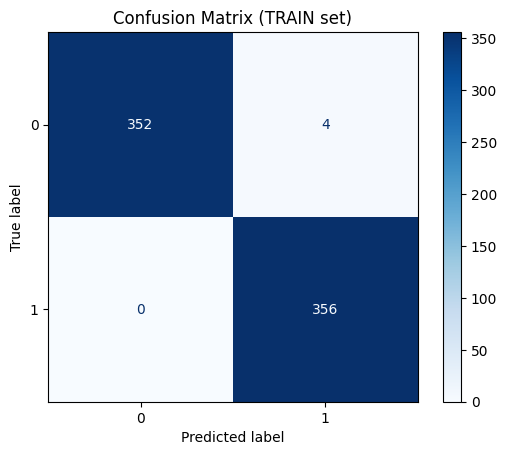

ROC curve plot saved to: plots/roc_curve_RandomForest_SMOTEN_train.png


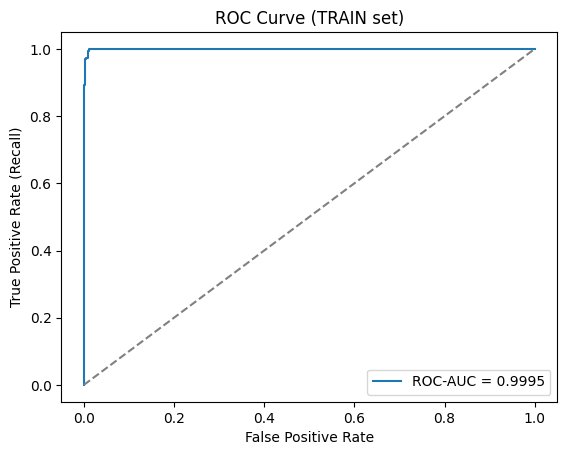

accuracy,▁
mcc,▁
pr_auc,▁
precision_diabetic,▁
precision_non_diabetic,▁
recall_diabetic,▁
recall_non_diabetic,▁
roc_auc,▁
accuracy,0.99438
dataset_split,train
mcc,0.98883


=== Best Parameters ===

{'rf__bootstrap': True, 'rf__max_depth': 15, 'rf__min_samples_split': 4, 'rf__n_estimators': 148} 


Results (VAL set):
=== Classification Report ===
              precision    recall  f1-score   support

Non-diabetic       0.66      0.79      0.72        68
    Diabetic       0.58      0.40      0.47        47

    accuracy                           0.63       115
   macro avg       0.62      0.60      0.60       115
weighted avg       0.62      0.63      0.62       115

=== Extra Metrics ===
Accuracy: 63.4783%
ROC-AUC: 0.6981
PR-AUC (Average Precision): 0.6157
MCC: 0.2156
Confusion matrix plot saved to: plots/confusion_matrix_RandomForest_SMOTEN_val.png


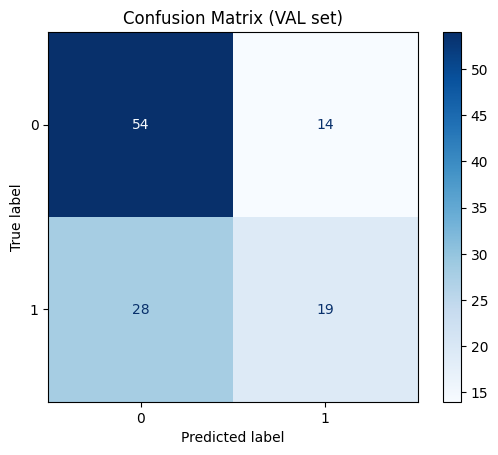

ROC curve plot saved to: plots/roc_curve_RandomForest_SMOTEN_val.png


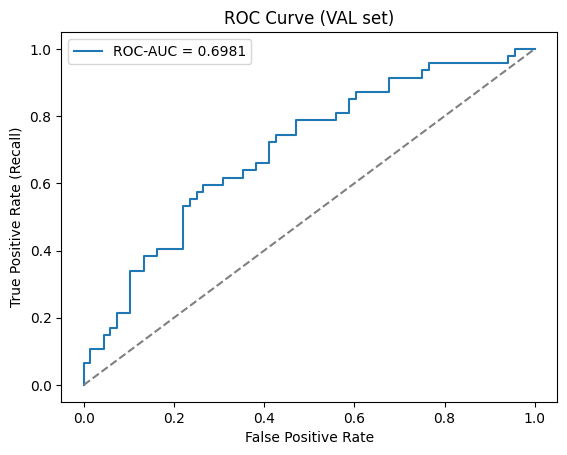

accuracy,▁
mcc,▁
pr_auc,▁
precision_diabetic,▁
precision_non_diabetic,▁
recall_diabetic,▁
recall_non_diabetic,▁
roc_auc,▁
accuracy,0.63478
dataset_split,val
mcc,0.21559




==================== SVMSMOTE ====================

----- Training DecisionTree with SVMSMOTE -----


=== Best Parameters ===

{'dt__criterion': 'log_loss', 'dt__max_depth': 19, 'dt__min_samples_split': 4} 


Results (TRAIN set):
=== Classification Report ===
              precision    recall  f1-score   support

Non-diabetic       0.95      0.95      0.95       356
    Diabetic       0.95      0.96      0.95       356

    accuracy                           0.95       712
   macro avg       0.95      0.95      0.95       712
weighted avg       0.95      0.95      0.95       712

=== Extra Metrics ===
Accuracy: 95.2247%
ROC-AUC: 0.9927
PR-AUC (Average Precision): 0.9896
MCC: 0.9045
Confusion matrix plot saved to: plots/confusion_matrix_DecisionTree_SVMSMOTE_train.png


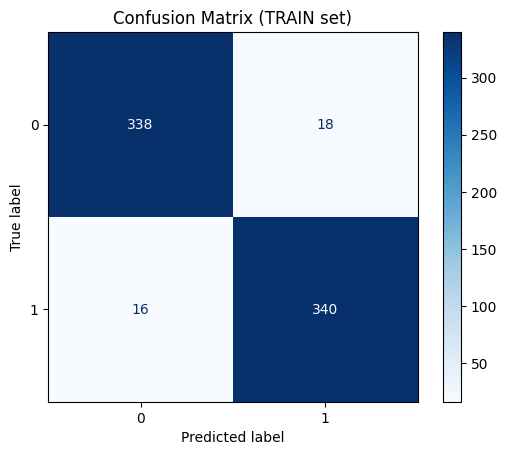

ROC curve plot saved to: plots/roc_curve_DecisionTree_SVMSMOTE_train.png


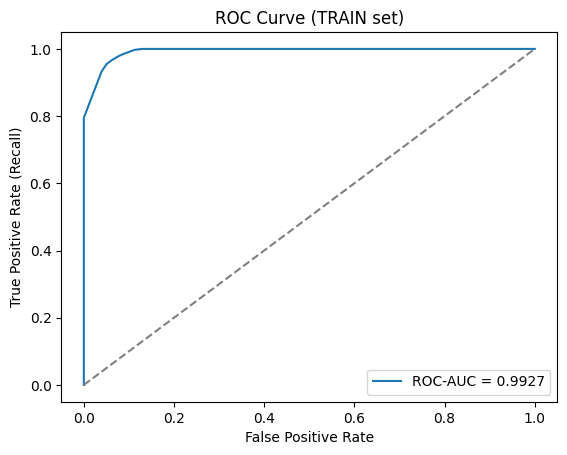

accuracy,▁
mcc,▁
pr_auc,▁
precision_diabetic,▁
precision_non_diabetic,▁
recall_diabetic,▁
recall_non_diabetic,▁
roc_auc,▁
accuracy,0.95225
dataset_split,train
mcc,0.90451


=== Best Parameters ===

{'dt__criterion': 'log_loss', 'dt__max_depth': 19, 'dt__min_samples_split': 4} 


Results (VAL set):
=== Classification Report ===
              precision    recall  f1-score   support

Non-diabetic       0.65      0.75      0.69        68
    Diabetic       0.53      0.40      0.46        47

    accuracy                           0.61       115
   macro avg       0.59      0.58      0.58       115
weighted avg       0.60      0.61      0.60       115

=== Extra Metrics ===
Accuracy: 60.8696%
ROC-AUC: 0.5826
PR-AUC (Average Precision): 0.4663
MCC: 0.1635
Confusion matrix plot saved to: plots/confusion_matrix_DecisionTree_SVMSMOTE_val.png


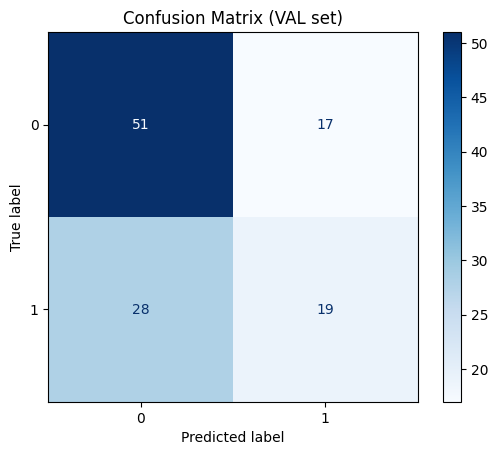

ROC curve plot saved to: plots/roc_curve_DecisionTree_SVMSMOTE_val.png


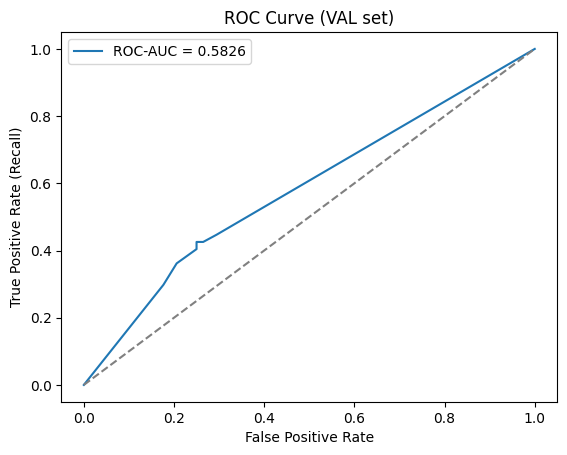

accuracy,▁
mcc,▁
pr_auc,▁
precision_diabetic,▁
precision_non_diabetic,▁
recall_diabetic,▁
recall_non_diabetic,▁
roc_auc,▁
accuracy,0.6087
dataset_split,val
mcc,0.16352



----- Training KNN with SVMSMOTE -----


=== Best Parameters ===

{'knn__n_neighbors': 5, 'knn__p': 2, 'knn__weights': 'distance'} 


Results (TRAIN set):
=== Classification Report ===
              precision    recall  f1-score   support

Non-diabetic       1.00      1.00      1.00       356
    Diabetic       1.00      1.00      1.00       356

    accuracy                           1.00       712
   macro avg       1.00      1.00      1.00       712
weighted avg       1.00      1.00      1.00       712

=== Extra Metrics ===
Accuracy: 100.0000%
ROC-AUC: 1.0000
PR-AUC (Average Precision): 1.0000
MCC: 1.0000
Confusion matrix plot saved to: plots/confusion_matrix_KNN_SVMSMOTE_train.png


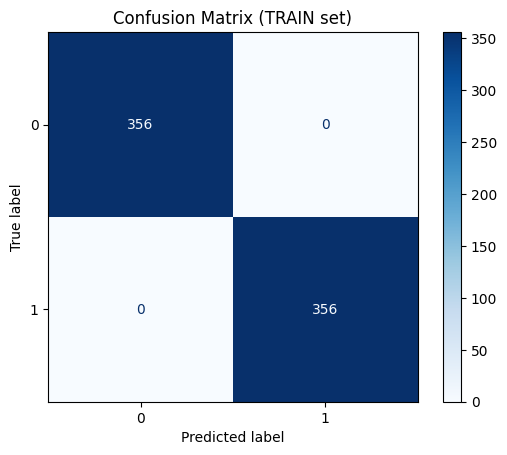

ROC curve plot saved to: plots/roc_curve_KNN_SVMSMOTE_train.png


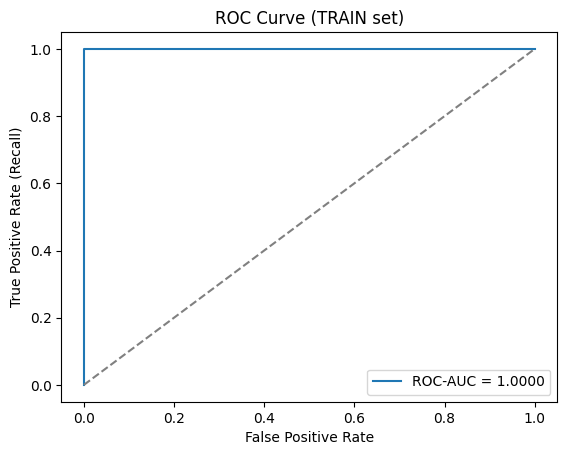

accuracy,▁
mcc,▁
pr_auc,▁
precision_diabetic,▁
precision_non_diabetic,▁
recall_diabetic,▁
recall_non_diabetic,▁
roc_auc,▁
accuracy,1
dataset_split,train
mcc,1


=== Best Parameters ===

{'knn__n_neighbors': 5, 'knn__p': 2, 'knn__weights': 'distance'} 


Results (VAL set):
=== Classification Report ===
              precision    recall  f1-score   support

Non-diabetic       0.70      0.84      0.77        68
    Diabetic       0.68      0.49      0.57        47

    accuracy                           0.70       115
   macro avg       0.69      0.66      0.67       115
weighted avg       0.69      0.70      0.68       115

=== Extra Metrics ===
Accuracy: 69.5652%
ROC-AUC: 0.6907
PR-AUC (Average Precision): 0.5842
MCC: 0.3529
Confusion matrix plot saved to: plots/confusion_matrix_KNN_SVMSMOTE_val.png


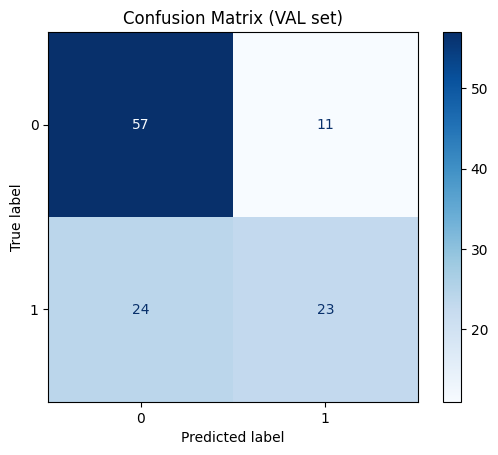

ROC curve plot saved to: plots/roc_curve_KNN_SVMSMOTE_val.png


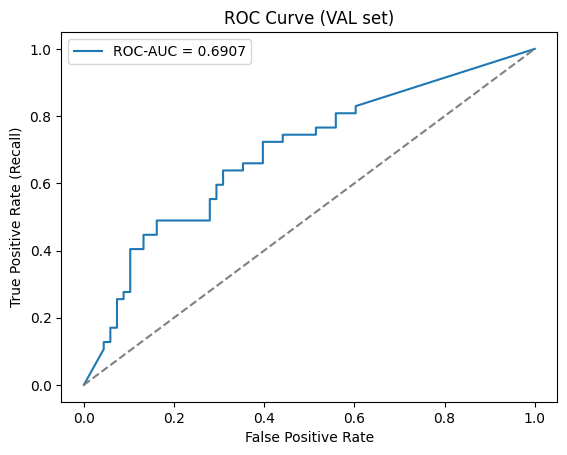

accuracy,▁
mcc,▁
pr_auc,▁
precision_diabetic,▁
precision_non_diabetic,▁
recall_diabetic,▁
recall_non_diabetic,▁
roc_auc,▁
accuracy,0.69565
dataset_split,val
mcc,0.35291



----- Training RandomForest with SVMSMOTE -----


=== Best Parameters ===

{'rf__bootstrap': True, 'rf__max_depth': 19, 'rf__min_samples_split': 2, 'rf__n_estimators': 263} 


Results (TRAIN set):
=== Classification Report ===
              precision    recall  f1-score   support

Non-diabetic       1.00      1.00      1.00       356
    Diabetic       1.00      1.00      1.00       356

    accuracy                           1.00       712
   macro avg       1.00      1.00      1.00       712
weighted avg       1.00      1.00      1.00       712

=== Extra Metrics ===
Accuracy: 100.0000%
ROC-AUC: 1.0000
PR-AUC (Average Precision): 1.0000
MCC: 1.0000
Confusion matrix plot saved to: plots/confusion_matrix_RandomForest_SVMSMOTE_train.png


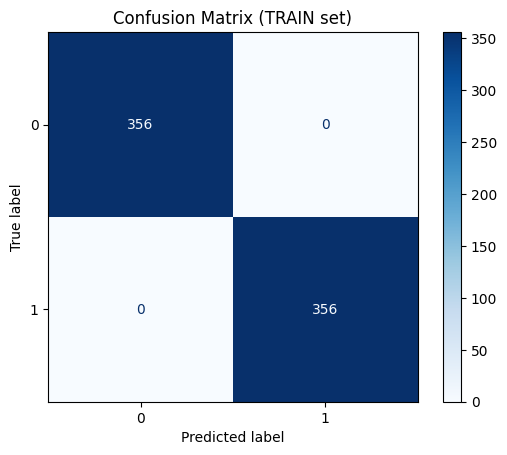

ROC curve plot saved to: plots/roc_curve_RandomForest_SVMSMOTE_train.png


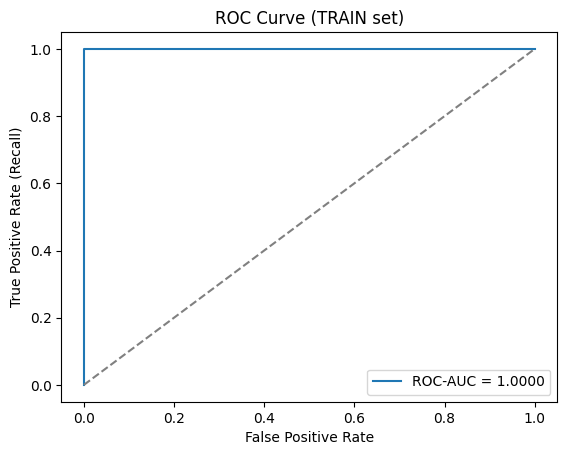

accuracy,▁
mcc,▁
pr_auc,▁
precision_diabetic,▁
precision_non_diabetic,▁
recall_diabetic,▁
recall_non_diabetic,▁
roc_auc,▁
accuracy,1
dataset_split,train
mcc,1


=== Best Parameters ===

{'rf__bootstrap': True, 'rf__max_depth': 19, 'rf__min_samples_split': 2, 'rf__n_estimators': 263} 


Results (VAL set):
=== Classification Report ===
              precision    recall  f1-score   support

Non-diabetic       0.67      0.85      0.75        68
    Diabetic       0.66      0.40      0.50        47

    accuracy                           0.67       115
   macro avg       0.66      0.63      0.63       115
weighted avg       0.67      0.67      0.65       115

=== Extra Metrics ===
Accuracy: 66.9565%
ROC-AUC: 0.7423
PR-AUC (Average Precision): 0.6271
MCC: 0.2912
Confusion matrix plot saved to: plots/confusion_matrix_RandomForest_SVMSMOTE_val.png


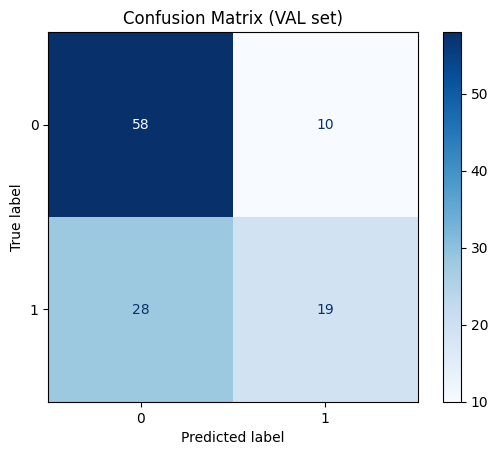

ROC curve plot saved to: plots/roc_curve_RandomForest_SVMSMOTE_val.png


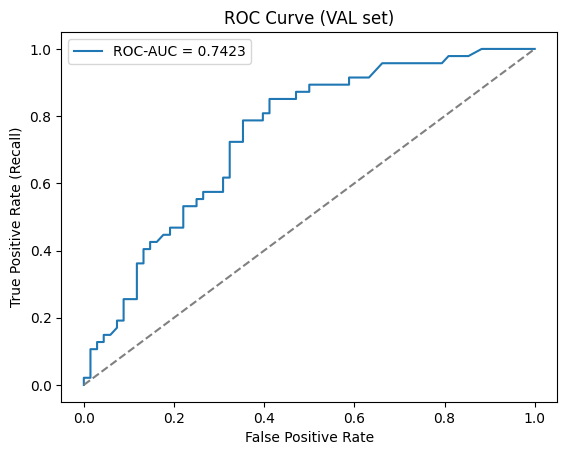

accuracy,▁
mcc,▁
pr_auc,▁
precision_diabetic,▁
precision_non_diabetic,▁
recall_diabetic,▁
recall_non_diabetic,▁
roc_auc,▁
accuracy,0.66957
dataset_split,val
mcc,0.29115




==================== SMOTEENN ====================

----- Training DecisionTree with SMOTEENN -----


=== Best Parameters ===

{'dt__criterion': 'gini', 'dt__max_depth': 18, 'dt__min_samples_split': 2} 


Results (TRAIN set):
=== Classification Report ===
              precision    recall  f1-score   support

Non-diabetic       1.00      1.00      1.00       169
    Diabetic       1.00      1.00      1.00       228

    accuracy                           1.00       397
   macro avg       1.00      1.00      1.00       397
weighted avg       1.00      1.00      1.00       397

=== Extra Metrics ===
Accuracy: 100.0000%
ROC-AUC: 1.0000
PR-AUC (Average Precision): 1.0000
MCC: 1.0000
Confusion matrix plot saved to: plots/confusion_matrix_DecisionTree_SMOTEENN_train.png


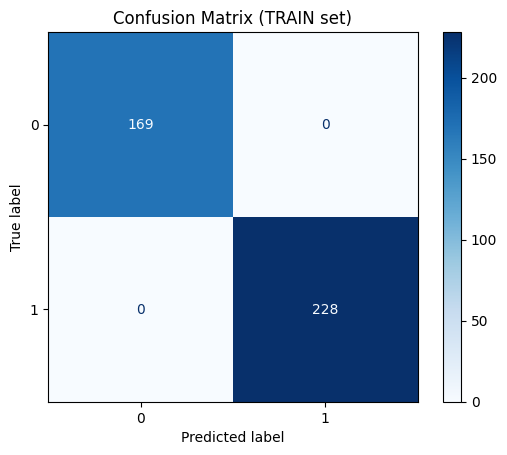

ROC curve plot saved to: plots/roc_curve_DecisionTree_SMOTEENN_train.png


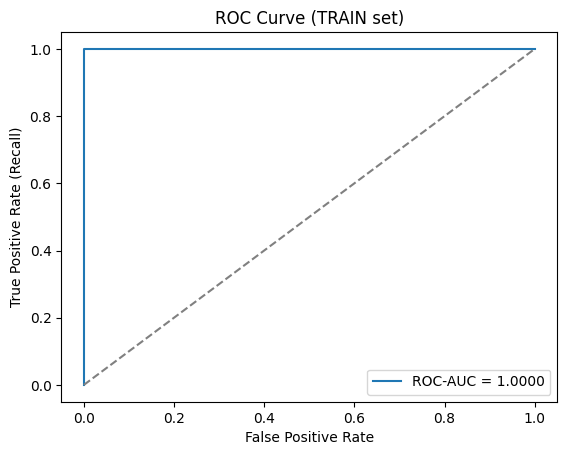

accuracy,▁
mcc,▁
pr_auc,▁
precision_diabetic,▁
precision_non_diabetic,▁
recall_diabetic,▁
recall_non_diabetic,▁
roc_auc,▁
accuracy,1
dataset_split,train
mcc,1


=== Best Parameters ===

{'dt__criterion': 'gini', 'dt__max_depth': 18, 'dt__min_samples_split': 2} 


Results (VAL set):
=== Classification Report ===
              precision    recall  f1-score   support

Non-diabetic       0.69      0.76      0.73        68
    Diabetic       0.60      0.51      0.55        47

    accuracy                           0.66       115
   macro avg       0.65      0.64      0.64       115
weighted avg       0.66      0.66      0.66       115

=== Extra Metrics ===
Accuracy: 66.0870%
ROC-AUC: 0.6377
PR-AUC (Average Precision): 0.5064
MCC: 0.2842
Confusion matrix plot saved to: plots/confusion_matrix_DecisionTree_SMOTEENN_val.png


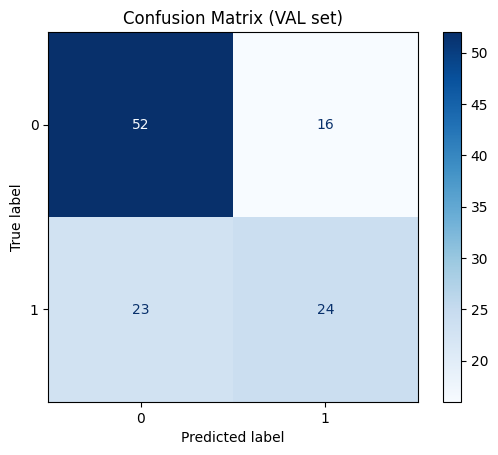

ROC curve plot saved to: plots/roc_curve_DecisionTree_SMOTEENN_val.png


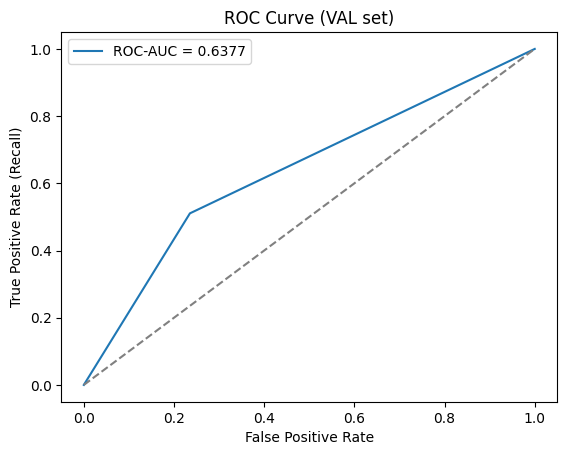

accuracy,▁
mcc,▁
pr_auc,▁
precision_diabetic,▁
precision_non_diabetic,▁
recall_diabetic,▁
recall_non_diabetic,▁
roc_auc,▁
accuracy,0.66087
dataset_split,val
mcc,0.2842



----- Training KNN with SMOTEENN -----


=== Best Parameters ===

{'knn__n_neighbors': 5, 'knn__p': 2, 'knn__weights': 'distance'} 


Results (TRAIN set):
=== Classification Report ===
              precision    recall  f1-score   support

Non-diabetic       1.00      1.00      1.00       169
    Diabetic       1.00      1.00      1.00       228

    accuracy                           1.00       397
   macro avg       1.00      1.00      1.00       397
weighted avg       1.00      1.00      1.00       397

=== Extra Metrics ===
Accuracy: 100.0000%
ROC-AUC: 1.0000
PR-AUC (Average Precision): 1.0000
MCC: 1.0000
Confusion matrix plot saved to: plots/confusion_matrix_KNN_SMOTEENN_train.png


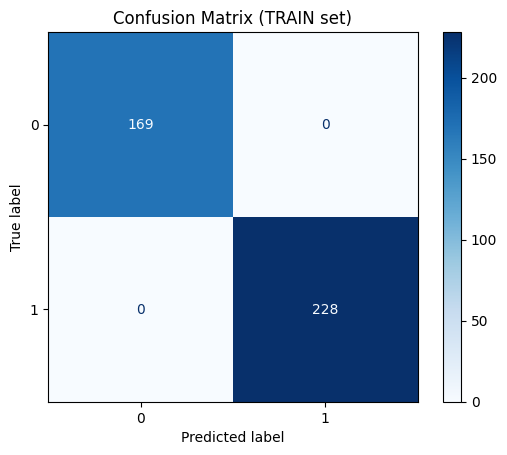

ROC curve plot saved to: plots/roc_curve_KNN_SMOTEENN_train.png


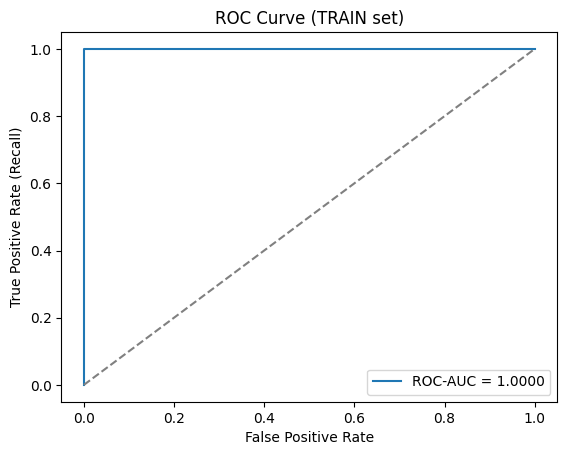

accuracy,▁
mcc,▁
pr_auc,▁
precision_diabetic,▁
precision_non_diabetic,▁
recall_diabetic,▁
recall_non_diabetic,▁
roc_auc,▁
accuracy,1
dataset_split,train
mcc,1


=== Best Parameters ===

{'knn__n_neighbors': 5, 'knn__p': 2, 'knn__weights': 'distance'} 


Results (VAL set):
=== Classification Report ===
              precision    recall  f1-score   support

Non-diabetic       0.76      0.71      0.73        68
    Diabetic       0.62      0.68      0.65        47

    accuracy                           0.70       115
   macro avg       0.69      0.69      0.69       115
weighted avg       0.70      0.70      0.70       115

=== Extra Metrics ===
Accuracy: 69.5652%
ROC-AUC: 0.7558
PR-AUC (Average Precision): 0.6566
MCC: 0.3820
Confusion matrix plot saved to: plots/confusion_matrix_KNN_SMOTEENN_val.png


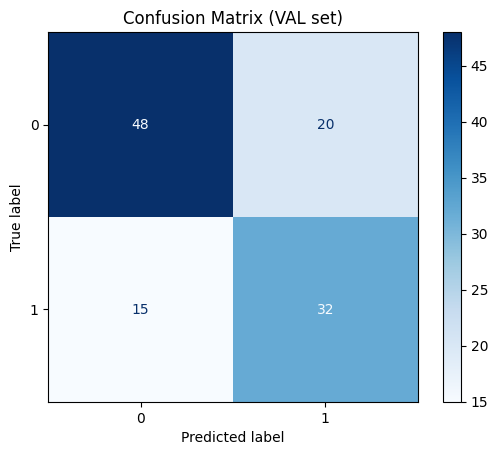

ROC curve plot saved to: plots/roc_curve_KNN_SMOTEENN_val.png


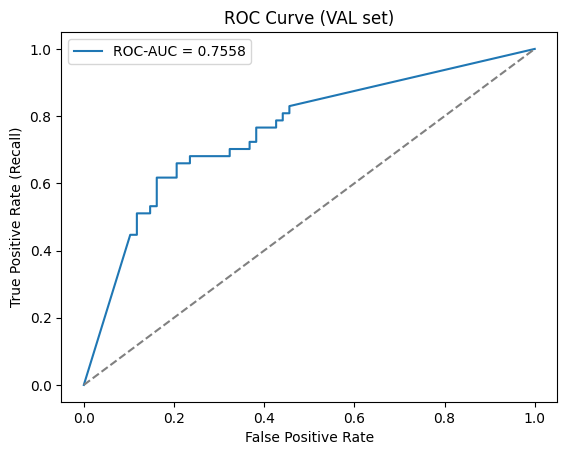

accuracy,▁
mcc,▁
pr_auc,▁
precision_diabetic,▁
precision_non_diabetic,▁
recall_diabetic,▁
recall_non_diabetic,▁
roc_auc,▁
accuracy,0.69565
dataset_split,val
mcc,0.38198



----- Training RandomForest with SMOTEENN -----


=== Best Parameters ===

{'rf__bootstrap': False, 'rf__max_depth': 18, 'rf__min_samples_split': 2, 'rf__n_estimators': 104} 


Results (TRAIN set):
=== Classification Report ===
              precision    recall  f1-score   support

Non-diabetic       1.00      1.00      1.00       169
    Diabetic       1.00      1.00      1.00       228

    accuracy                           1.00       397
   macro avg       1.00      1.00      1.00       397
weighted avg       1.00      1.00      1.00       397

=== Extra Metrics ===
Accuracy: 100.0000%
ROC-AUC: 1.0000
PR-AUC (Average Precision): 1.0000
MCC: 1.0000
Confusion matrix plot saved to: plots/confusion_matrix_RandomForest_SMOTEENN_train.png


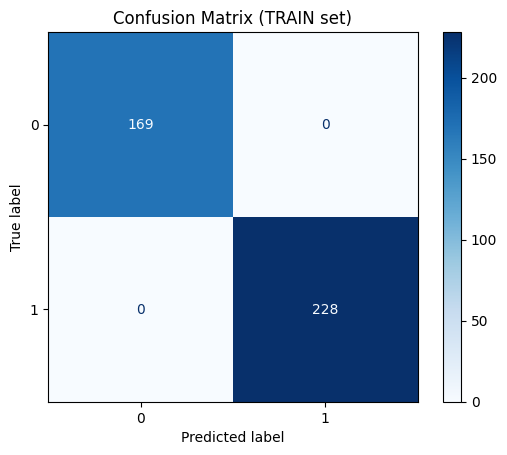

ROC curve plot saved to: plots/roc_curve_RandomForest_SMOTEENN_train.png


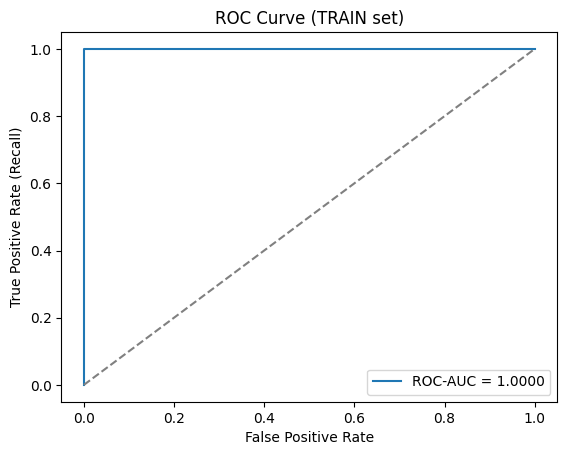

accuracy,▁
mcc,▁
pr_auc,▁
precision_diabetic,▁
precision_non_diabetic,▁
recall_diabetic,▁
recall_non_diabetic,▁
roc_auc,▁
accuracy,1
dataset_split,train
mcc,1


=== Best Parameters ===

{'rf__bootstrap': False, 'rf__max_depth': 18, 'rf__min_samples_split': 2, 'rf__n_estimators': 104} 


Results (VAL set):
=== Classification Report ===
              precision    recall  f1-score   support

Non-diabetic       0.74      0.76      0.75        68
    Diabetic       0.64      0.62      0.63        47

    accuracy                           0.70       115
   macro avg       0.69      0.69      0.69       115
weighted avg       0.70      0.70      0.70       115

=== Extra Metrics ===
Accuracy: 70.4348%
ROC-AUC: 0.7772
PR-AUC (Average Precision): 0.6410
MCC: 0.3845
Confusion matrix plot saved to: plots/confusion_matrix_RandomForest_SMOTEENN_val.png


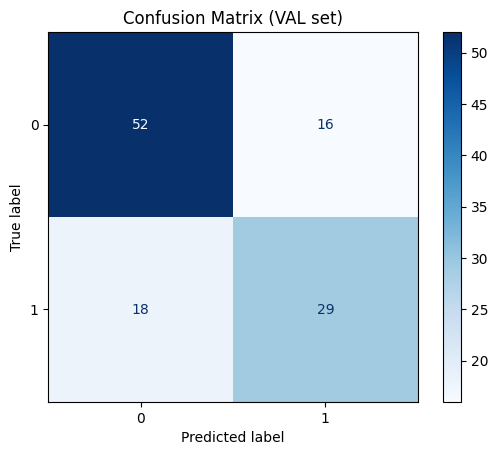

ROC curve plot saved to: plots/roc_curve_RandomForest_SMOTEENN_val.png


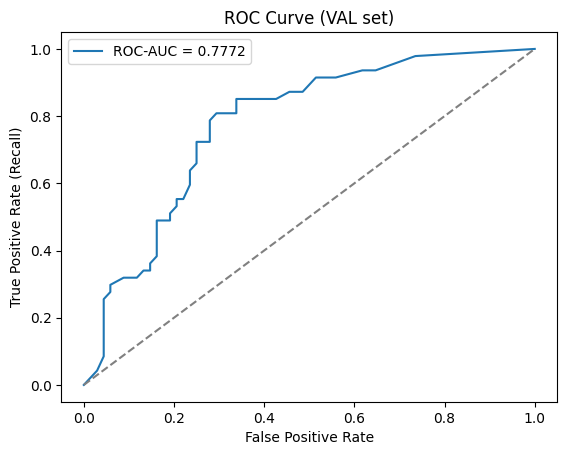

accuracy,▁
mcc,▁
pr_auc,▁
precision_diabetic,▁
precision_non_diabetic,▁
recall_diabetic,▁
recall_non_diabetic,▁
roc_auc,▁
accuracy,0.70435
dataset_split,val
mcc,0.3845


In [ ]:
from imblearn.over_sampling import SMOTE, ADASYN, SVMSMOTE, SMOTEN
from imblearn.combine import SMOTEENN

imbalance_methods = [SMOTE, ADASYN, SMOTEN, SVMSMOTE, SMOTEENN]

base_models = {
    "DecisionTree": {
        "pipeline": Pipeline([
            ("preprocessing", preprocessing),
            ("dt", DecisionTreeClassifier(class_weight="balanced"))
        ]),
        "params": {
            "dt__max_depth": randint(2, 20),
            "dt__min_samples_split": randint(2, 10),
            "dt__criterion": ["gini", "entropy", "log_loss"]
        }
    },
    "KNN": {
        "pipeline": Pipeline([
            ("preprocessing", preprocessing_with_scaling),
            ("knn", KNeighborsClassifier(weights="distance"))
        ]),
        "params": {
            "knn__n_neighbors": randint(3, 15),
            "knn__weights": ["uniform", "distance"],
            "knn__p": [1, 2]
        }
    },
    "RandomForest": {
        "pipeline": Pipeline([
            ("preprocessing", preprocessing),
            ("rf", RandomForestClassifier(class_weight="balanced"))
        ]),
        "params": {
            "rf__n_estimators": randint(100, 300),
            "rf__max_depth": randint(3, 20),
            "rf__min_samples_split": randint(2, 10),
            "rf__bootstrap": [True, False]
        }
    }
}

# Iterate over imbalance methods and models
for method in imbalance_methods:
    print(f"\n\n==================== {method.__name__} ====================")
    sampler = method(random_state=21)
    X_train_res, y_train_res = sampler.fit_resample(X_train, y_train)

    for model_name, cfg in base_models.items():
        print(f"\n----- Training {model_name} with {method.__name__} -----")

        search = RandomizedSearchCV(
            estimator=cfg["pipeline"],
            param_distributions=cfg["params"],
            cv=5,
            random_state=21,
            n_iter=10,
            n_jobs=-1
        )

        search.fit(X_train_res, y_train_res)

        # Evaluate on train and validation using your W&B logger
        evaluate_binary_classification(
            model=search,
            X=X_train_res,
            y=y_train_res,
            data_split="train",
            model_name=model_name,
            sampling_method=method.__name__
        )

        evaluate_binary_classification(
            model=search,
            X=X_val,
            y=y_val,
            data_split="val",
            model_name=model_name,
            sampling_method=method.__name__
        )


## 6- Calibration

> I forgot to save the model, so I’ll have to retrain it. Hopefully, since I used `random_state=21` and saved the `best_params`, I can rebuild the same model for calibration and final evaluation.


Results (TRAIN set):
=== Classification Report ===
              precision    recall  f1-score   support

Non-diabetic       0.92      0.66      0.77       356
    Diabetic       0.57      0.89      0.69       181

    accuracy                           0.74       537
   macro avg       0.75      0.77      0.73       537
weighted avg       0.80      0.74      0.74       537

=== Extra Metrics ===
Accuracy: 73.5568%
ROC-AUC: 0.8424
PR-AUC (Average Precision): 0.6611
MCC: 0.5177
Confusion matrix plot saved to: plots/confusion_matrix_kneighbors_knn_rep_SMOTEENN_rep_train.png


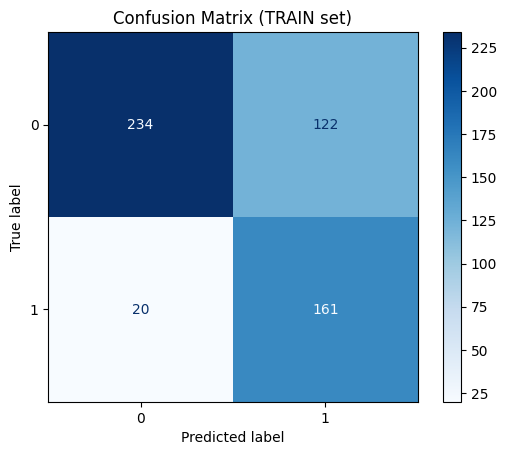

ROC curve plot saved to: plots/roc_curve_kneighbors_knn_rep_SMOTEENN_rep_train.png


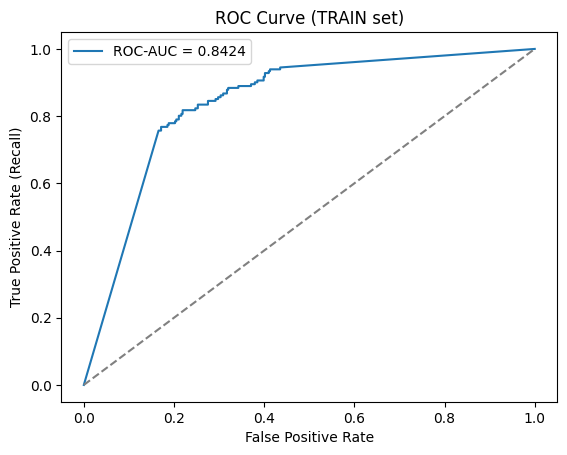

accuracy,▁
mcc,▁
pr_auc,▁
precision_diabetic,▁
precision_non_diabetic,▁
recall_diabetic,▁
recall_non_diabetic,▁
roc_auc,▁
accuracy,0.73557
dataset_split,train
mcc,0.51771



Results (VAL set):
=== Classification Report ===
              precision    recall  f1-score   support

Non-diabetic       0.77      0.72      0.74        68
    Diabetic       0.63      0.68      0.65        47

    accuracy                           0.70       115
   macro avg       0.70      0.70      0.70       115
weighted avg       0.71      0.70      0.71       115

=== Extra Metrics ===
Accuracy: 70.4348%
ROC-AUC: 0.7602
PR-AUC (Average Precision): 0.6632
MCC: 0.3972
Confusion matrix plot saved to: plots/confusion_matrix_kneighbors_knn_rep_SMOTEENN_rep_val.png


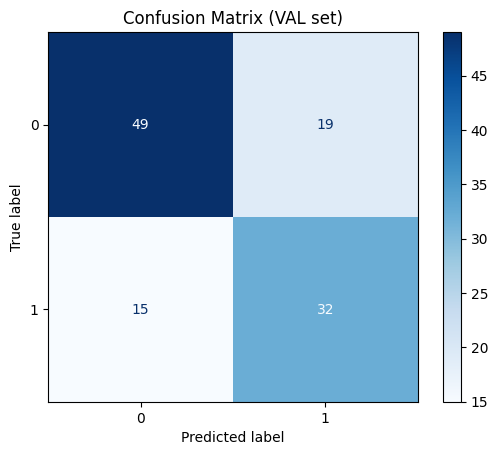

ROC curve plot saved to: plots/roc_curve_kneighbors_knn_rep_SMOTEENN_rep_val.png


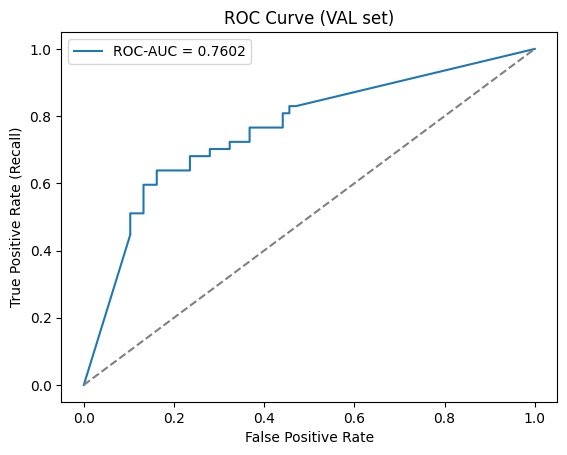


Model saved to: models/kneighbors_knn_rep_SMOTEENN_rep.pkl


accuracy,▁
mcc,▁
pr_auc,▁
precision_diabetic,▁
precision_non_diabetic,▁
recall_diabetic,▁
recall_non_diabetic,▁
roc_auc,▁
accuracy,0.70435
dataset_split,val
mcc,0.39724


{'best_params': {},
 'accuracy': 0.7043478260869566,
 'roc_auc': np.float64(0.7601689612015019),
 'pr_auc': np.float64(0.6631992190048663),
 'mcc': np.float64(0.3972356304148323),
 'report': {'Non-diabetic': {'precision': 0.765625,
   'recall': 0.7205882352941176,
   'f1-score': 0.7424242424242424,
   'support': 68.0},
  'Diabetic': {'precision': 0.6274509803921569,
   'recall': 0.6808510638297872,
   'f1-score': 0.6530612244897959,
   'support': 47.0},
  'accuracy': 0.7043478260869566,
  'macro avg': {'precision': 0.6965379901960784,
   'recall': 0.7007196495619524,
   'f1-score': 0.6977427334570192,
   'support': 115.0},
  'weighted avg': {'precision': 0.7091538789428814,
   'recall': 0.7043478260869566,
   'f1-score': 0.7059019655292947,
   'support': 115.0}},
 'confusion_matrix': array([[49, 19],
        [15, 32]])}

In [25]:
from sklearn.neighbors import KNeighborsClassifier
from imblearn.combine import SMOTEENN

sampler = SMOTEENN(random_state=21)
X_train_res, y_train_res = sampler.fit_resample(X_train, y_train)

knn_params = {"n_neighbors":5,"p":2,"weights":"distance"}

knn_pipeline = Pipeline(steps=[
    ("preprocessing", preprocessing),
    ("knn", KNeighborsClassifier(**knn_params))
])

knn_model =  knn_pipeline
knn_model.fit(X_train_res, y_train_res)


evaluate_binary_classification(
  model= knn_model,
  X=X_train,
  y= y_train,
  data_split="train",
  model_name="kneighbors_knn_rep",
  sampling_method="SMOTEENN_rep",

  )
evaluate_binary_classification(
  model= knn_model,
  X=X_val,
  y=y_val,
  data_split="val",
  model_name="kneighbors_knn_rep",
  sampling_method="SMOTEENN_rep",
  save_model=True
)

In [48]:
from sklearn.calibration import CalibratedClassifierCV, calibration_curve
from sklearn.metrics import brier_score_loss, accuracy_score
from sklearn.frozen import FrozenEstimator

In [59]:
calibrated_model = CalibratedClassifierCV(estimator=knn_model, method="sigmoid", cv="prefit")
calibrated_model.fit(X_val, y_val)

/usr/local/lib/python3.12/dist-packages/sklearn/calibration.py:333: UserWarning: The `cv='prefit'` option is deprecated in 1.6 and will be removed in 1.8. You can use CalibratedClassifierCV(FrozenEstimator(estimator)) instead.
  warnings.warn(


CalibratedClassifierCV(cv='prefit',
                       estimator=Pipeline(steps=[('preprocessing',
                                                  ColumnTransformer(transformers=[('median',
                                                                                   SimpleImputer(missing_values=0,
                                                                                                 strategy='median'),
                                                                                   ['SkinThickness',
                                                                                    'BMI',
                                                                                    'Insulin']),
                                                                                  ('mean',
                                                                                   SimpleImputer(missing_values=0),
                                                                                   ['Glucose',
                                                                                    'BloodPressure'])])),
                                                 ('knn',
                                                  KNeighborsClassifier(weights='distance'))]))

In [60]:
y_prob_base = knn_model.predict_proba(X_test)[:, 1]
y_prob_calib = calibrated_model.predict_proba(X_test)[:, 1]

print("Accuracy    (Base):", accuracy_score(y_test, knn_model.predict(X_test)))
print("Accuracy    (Calibrated):", accuracy_score(y_test, calibrated_model.predict(X_test)))
print("Brier Score (Base):", brier_score_loss(y_test, y_prob_base))
print("Brier Score (Calibrated):", brier_score_loss(y_test, y_prob_calib))

Accuracy    (Base): 0.7672413793103449
Accuracy    (Calibrated): 0.75
Brier Score (Base): 0.17454075705643066
Brier Score (Calibrated): 0.15599953481042295


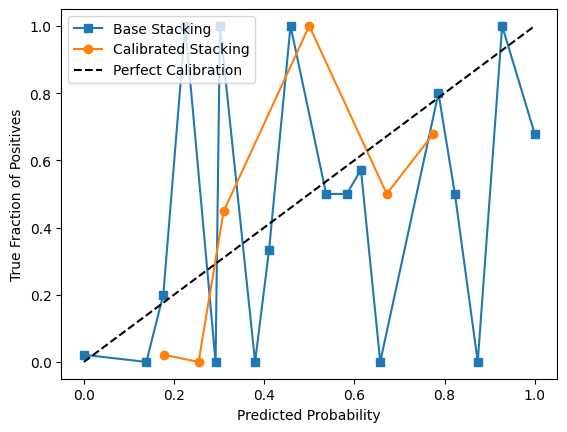

In [40]:
prob_true_base, prob_pred_base = calibration_curve(y_test, y_prob_base, n_bins=20)
prob_true_calib, prob_pred_calib = calibration_curve(y_test, y_prob_calib, n_bins=20)

plt.plot(prob_pred_base, prob_true_base, "s-", label="Base Stacking")
plt.plot(prob_pred_calib, prob_true_calib, "o-", label="Calibrated Stacking")
plt.plot([0, 1], [0, 1], "k--", label="Perfect Calibration")
plt.xlabel("Predicted Probability")
plt.ylabel("True Fraction of Positives")
plt.legend()
plt.show()


Results (VAL set):
=== Classification Report ===
              precision    recall  f1-score   support

Non-diabetic       0.76      0.87      0.81        68
    Diabetic       0.76      0.60      0.67        47

    accuracy                           0.76       115
   macro avg       0.76      0.73      0.74       115
weighted avg       0.76      0.76      0.75       115

=== Extra Metrics ===
Accuracy: 75.6522%
ROC-AUC: 0.7744
PR-AUC (Average Precision): 0.6671
MCC: 0.4876
Confusion matrix plot saved to: plots/confusion_matrix_calibrated_model_original_val.png


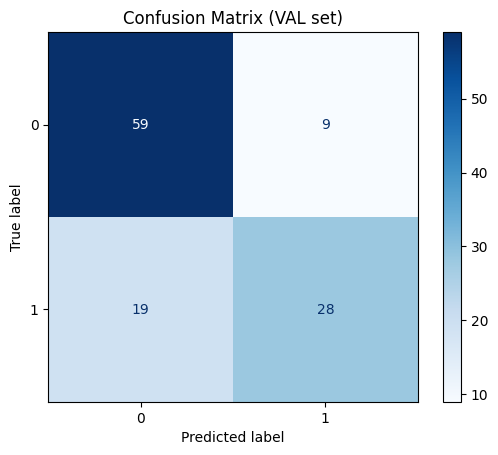

ROC curve plot saved to: plots/roc_curve_calibrated_model_original_val.png


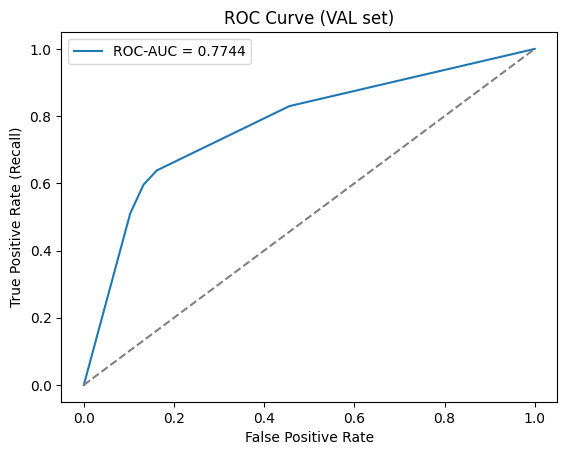


Model saved to: models/calibrated_model_original.pkl


accuracy,▁
mcc,▁
pr_auc,▁
precision_diabetic,▁
precision_non_diabetic,▁
recall_diabetic,▁
recall_non_diabetic,▁
roc_auc,▁
accuracy,0.75652
dataset_split,val
mcc,0.48764


{'best_params': {},
 'accuracy': 0.7565217391304347,
 'roc_auc': np.float64(0.7744055068836044),
 'pr_auc': np.float64(0.6671263351944832),
 'mcc': np.float64(0.4876447015759293),
 'report': {'Non-diabetic': {'precision': 0.7564102564102564,
   'recall': 0.8676470588235294,
   'f1-score': 0.8082191780821918,
   'support': 68.0},
  'Diabetic': {'precision': 0.7567567567567568,
   'recall': 0.5957446808510638,
   'f1-score': 0.6666666666666666,
   'support': 47.0},
  'accuracy': 0.7565217391304347,
  'macro avg': {'precision': 0.7565835065835066,
   'recall': 0.7316958698372966,
   'f1-score': 0.7374429223744292,
   'support': 115.0},
  'weighted avg': {'precision': 0.7565518695953479,
   'recall': 0.7565217391304347,
   'f1-score': 0.7503672821123685,
   'support': 115.0}},
 'confusion_matrix': array([[59,  9],
        [19, 28]])}

In [34]:
evaluate_binary_classification(
  model= calibrated_model,
  X=X_val,
  y=y_val,
  data_split="val",
  model_name="calibrated_model",
  save_model=True
)


Results (TEST set):
=== Classification Report ===
              precision    recall  f1-score   support

Non-diabetic       0.82      0.79      0.81        76
    Diabetic       0.63      0.68      0.65        40

    accuracy                           0.75       116
   macro avg       0.72      0.73      0.73       116
weighted avg       0.76      0.75      0.75       116

=== Extra Metrics ===
Accuracy: 75.0000%
ROC-AUC: 0.8429
PR-AUC (Average Precision): 0.6511
MCC: 0.4571
Confusion matrix plot saved to: plots/confusion_matrix_final_test_calibrated_model_knn_original_test.png


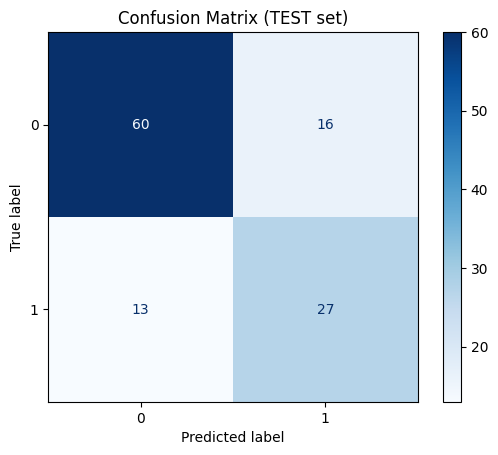

ROC curve plot saved to: plots/roc_curve_final_test_calibrated_model_knn_original_test.png


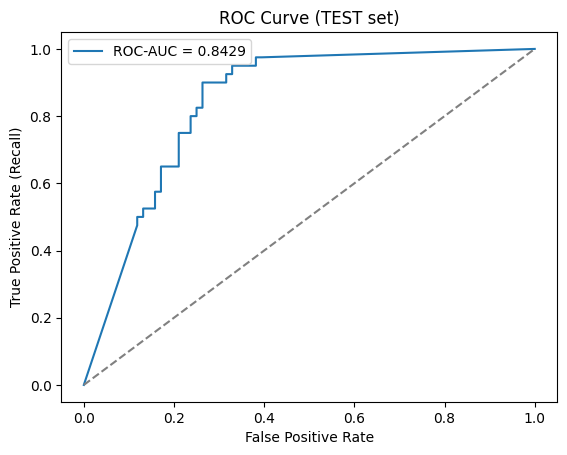


Model saved to: models/final_test_calibrated_model_knn_original.pkl


accuracy,▁
mcc,▁
pr_auc,▁
precision_diabetic,▁
precision_non_diabetic,▁
recall_diabetic,▁
recall_non_diabetic,▁
roc_auc,▁
accuracy,0.75
dataset_split,test
mcc,0.45709


{'best_params': {},
 'accuracy': 0.75,
 'roc_auc': np.float64(0.8429276315789475),
 'pr_auc': np.float64(0.6510610051605188),
 'mcc': np.float64(0.45709055461816483),
 'report': {'Non-diabetic': {'precision': 0.821917808219178,
   'recall': 0.7894736842105263,
   'f1-score': 0.8053691275167785,
   'support': 76.0},
  'Diabetic': {'precision': 0.627906976744186,
   'recall': 0.675,
   'f1-score': 0.6506024096385542,
   'support': 40.0},
  'accuracy': 0.75,
  'macro avg': {'precision': 0.724912392481682,
   'recall': 0.7322368421052632,
   'f1-score': 0.7279857685776663,
   'support': 116.0},
  'weighted avg': {'precision': 0.7550175215036635,
   'recall': 0.75,
   'f1-score': 0.7520012937656667,
   'support': 116.0}},
 'confusion_matrix': array([[60, 16],
        [13, 27]])}

In [62]:
evaluate_binary_classification(
  model= calibrated_model,
  X=X_test,
  y=y_test,
  data_split="test",
  model_name="final_test_calibrated_model_knn",
  save_model=True
)